In [ ]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.7 MB/s eta 0:00:00


In [ ]:
pip install --upgrade yfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.8/109.8 kB 3.2 MB/s eta 0:00:00
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.54
    Uninstalling yfinance-0.2.54:
      Successfully uninstalled yfinance-0.2.54


In [1]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import numpy as np
#import optuna

In [2]:
def prepare_sentiment_data(company_name, filename):
  from google.colab import drive

  drive.mount('/content/gdrive')

  news_data = pd.read_excel(r"/content/gdrive/My Drive/Dataset/"+filename,sheet_name=company_name)
  news_data['date']=pd.to_datetime(news_data['date']).dt.date

  news_data.dropna(inplace=True)
  news_data['sentiment'] = news_data['sentiment'].apply(ast.literal_eval)
  news_data['polarity score'] = news_data['sentiment'].apply(lambda x: x.get('polarity'))

  polarity = news_data.groupby('date')['polarity score'].mean()
  polarity = pd.DataFrame(polarity)
  polarity = polarity.rename(columns={'polarity score':company_name+'_polarity'})

  return polarity

In [3]:
toyota_polarity = prepare_sentiment_data('Toyota', "News_Info.xlsx")
toyota_polarity

Mounted at /content/gdrive


,Toyota_polarity
date,
2015-09-17,0.997000
2015-09-21,0.996000
2015-10-16,0.998000
2016-02-03,0.994000
2016-03-09,1.000000
...,...
2024-05-02,0.999000
2024-05-03,0.724500
2024-05-06,0.927500


In [4]:
apple_polarity = prepare_sentiment_data('Apple', "News_Info.xlsx")
apple_polarity

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,Apple_polarity
date,
2016-02-19,0.994000
2017-10-05,0.997000
2017-11-27,0.997000
2017-11-30,0.989000
2018-01-31,0.995000
...,...
2024-05-04,0.903100
2024-05-05,0.764286
2024-05-06,0.718313


In [5]:
amazon_polarity = prepare_sentiment_data('Amazon', "News_Info.xlsx")
amazon_polarity

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,Amazon_polarity
date,
2015-10-22,0.989000
2016-01-11,0.983000
2016-05-05,0.997000
2016-06-16,0.999000
2016-08-11,0.926000
...,...
2024-05-04,0.829667
2024-05-05,0.660286
2024-05-06,0.502969


In [6]:

nissan_polarity = prepare_sentiment_data('Nissan',"News_Info.xlsx")
nissan_polarity

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,Nissan_polarity
date,
2015-05-20,0.2730
2016-12-09,0.2140
2017-05-05,-0.6490
2017-08-17,0.0000
2017-09-06,0.6250
...,...
2024-04-25,0.3960
2024-04-26,0.9550
2024-04-30,0.1885


In [7]:
honda_polarity = prepare_sentiment_data('Honda',"News_Info.xlsx")
honda_polarity

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,Honda_polarity
date,
2018-03-12,0.995000
2018-03-16,0.991000
2018-04-11,0.996000
2018-09-26,0.997000
2018-11-02,0.998000
...,...
2024-04-26,0.893667
2024-04-28,0.864000
2024-04-29,0.999000


In [8]:
mazda_polarity = prepare_sentiment_data('Mazda',"News_Info.xlsx")
mazda_polarity

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,Mazda_polarity
date,
2016-04-14,0.3400
2017-08-03,0.4400
2020-06-16,0.9915
2020-06-30,0.9930
2020-07-03,0.9950
...,...
2024-02-21,0.9490
2024-02-28,0.9990
2024-03-07,0.9990


In [9]:
ford_polarity = prepare_sentiment_data('Ford',"News_Info_part2.xlsx")
ford_polarity

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,Ford_polarity
date,
2017-10-05,0.997000
2017-10-30,0.034000
2017-11-02,0.758000
2017-11-17,0.396000
2017-11-21,0.170000
...,...
2024-05-04,0.996500
2024-05-05,0.905000
2024-05-06,0.817571


In [10]:
GM_polarity = prepare_sentiment_data('GM',"News_Info_part2.xlsx")
GM_polarity

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,GM_polarity
date,
2016-03-11,0.998000
2017-04-10,0.992000
2017-06-02,-0.900000
2017-06-13,-0.477000
2017-06-14,-0.902000
...,...
2024-05-04,0.997000
2024-05-05,0.905000
2024-05-06,0.905500


In [11]:
vw_polarity = prepare_sentiment_data('Volkswagen',"News_Info_part2.xlsx")
vw_polarity

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,Volkswagen_polarity
date,
2020-04-17,-0.9380
2020-04-27,0.7600
2020-05-01,0.9860
2020-05-26,0.7770
2020-06-03,-0.9930
...,...
2024-04-30,0.2788
2024-05-01,0.9950
2024-05-03,0.9850


In [12]:
bmw_polarity = prepare_sentiment_data('BMW',"News_Info_part2.xlsx")
bmw_polarity

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,BMW_polarity
date,
2017-01-10,0.4120
2017-06-29,0.6250
2018-01-09,0.0000
2019-07-18,0.8630
2019-11-12,0.1280
...,...
2024-04-24,0.9960
2024-04-30,0.9950
2024-05-01,0.9970


In [13]:
byd_polarity = prepare_sentiment_data('BYD',"News_Info.xlsx")
byd_polarity

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,BYD_polarity
date,
2020-04-08,0.9940
2021-08-22,0.9640
2021-09-08,-0.0655
2021-09-09,0.9930
2021-09-13,0.9800
...,...
2024-05-01,0.9980
2024-05-04,0.9690
2024-05-06,0.9860


In [14]:
tesla_polarity = prepare_sentiment_data('TSLA',"News_Info.xlsx")
tesla_polarity

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,TSLA_polarity
date,
2015-07-16,0.989000
2015-07-22,0.318000
2015-08-05,0.318000
2015-08-13,0.989000
2015-08-31,0.898000
...,...
2024-05-04,0.434000
2024-05-05,0.137250
2024-05-06,0.474737


In [15]:
hyundai_polarity = prepare_sentiment_data('Hyundai',"News_Info_part3.xlsx")
hyundai_polarity

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,Hyundai_polarity
date,
2016-06-20,0.00000
2020-01-07,-0.17800
2020-01-13,0.45900
2020-03-26,-0.59750
2020-03-27,-0.07250
...,...
2024-05-01,0.99600
2024-05-02,0.95525
2024-05-06,0.98200


In [16]:
polarity_data = pd.merge(toyota_polarity,nissan_polarity,on='date',how='left')
polarity_data = pd.merge(polarity_data,honda_polarity,on='date',how='left')
polarity_data = pd.merge(polarity_data,mazda_polarity,on='date',how='left')
polarity_data = pd.merge(polarity_data,ford_polarity,on='date',how='left')
polarity_data = pd.merge(polarity_data,GM_polarity,on='date',how='left')
polarity_data = pd.merge(polarity_data,vw_polarity,on='date',how='left')
polarity_data = pd.merge(polarity_data,bmw_polarity,on='date',how='left')
polarity_data = pd.merge(polarity_data,apple_polarity,on='date',how='left')
polarity_data = pd.merge(polarity_data,amazon_polarity,on='date',how='left')
polarity_data = pd.merge(polarity_data,byd_polarity,on='date',how='left')
polarity_data = pd.merge(polarity_data,tesla_polarity,on='date',how='left')
polarity_data = pd.merge(polarity_data,hyundai_polarity,on='date',how='left')
polarity_data.fillna(0,inplace=True)
polarity_data

,Toyota_polarity,Nissan_polarity,Honda_polarity,Mazda_polarity,Ford_polarity,GM_polarity,Volkswagen_polarity,BMW_polarity,Apple_polarity,Amazon_polarity,BYD_polarity,TSLA_polarity,Hyundai_polarity
date,,,,,,,,,,,,,
2015-09-17,0.997000,0.000,0.000,0.0,0.000000,0.000000,0.000,0.0000,0.000000,0.000000,0.000,0.000000,0.00000
2015-09-21,0.996000,0.000,0.000,0.0,0.000000,0.000000,0.000,0.0000,0.000000,0.000000,0.000,0.000000,0.00000
2015-10-16,0.998000,0.000,0.000,0.0,0.000000,0.000000,0.000,0.0000,0.000000,0.000000,0.000,0.000000,0.00000
2016-02-03,0.994000,0.000,0.000,0.0,0.000000,0.000000,0.000,0.0000,0.000000,0.000000,0.000,0.000000,0.00000
2016-03-09,1.000000,0.000,0.000,0.0,0.000000,0.000000,0.000,0.0000,0.000000,0.000000,0.000,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-02,0.999000,0.000,0.000,0.0,0.977250,0.881500,0.000,0.0000,0.687296,0.678538,0.000,0.694917,0.95525
2024-05-03,0.724500,0.990,0.990,0.0,0.542000,0.997000,0.985,0.9915,0.520036,0.807056,0.000,0.635706,0.00000
2024-05-06,0.927500,0.000,0.000,0.0,0.817571,0.905500,0.000,0.0000,0.718313,0.502969,0.986,0.474737,0.98200


In [17]:
import yfinance as yf

start_date = "2015-05-01"
end_date = "2024-05-08"

stock_data = yf.Ticker('7203.T')
stock_data = stock_data.history(start=start_date, end=end_date)
stock_data.index = pd.to_datetime(stock_data.index)
stock_data['date'] = stock_data.index
stock_data.reset_index(drop=True, inplace=True)

stock_data.set_index('date',inplace=True)
stock_data.index = stock_data.index.date

In [18]:
stock_data = pd.merge(stock_data, polarity_data,left_index=True,right_index=True,how='left').fillna(0)
stock_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Toyota_polarity,Nissan_polarity,Honda_polarity,Mazda_polarity,Ford_polarity,GM_polarity,Volkswagen_polarity,BMW_polarity,Apple_polarity,Amazon_polarity,BYD_polarity,TSLA_polarity,Hyundai_polarity
2015-05-01,1225.572542,1228.083374,1212.870814,1228.083374,37228500,0.0,0.0,0.000000,0.0000,0.000000,0.0,0.000000,0.000000,0.0000,0.000,0.000000,0.000000,0.000,0.000000,0.00000
2015-05-07,1218.630533,1220.845956,1211.688945,1213.165894,40812500,0.0,0.0,0.000000,0.0000,0.000000,0.0,0.000000,0.000000,0.0000,0.000,0.000000,0.000000,0.000,0.000000,0.00000
2015-05-08,1212.870900,1232.957377,1209.621593,1222.766479,44073500,0.0,0.0,0.000000,0.0000,0.000000,0.0,0.000000,0.000000,0.0000,0.000,0.000000,0.000000,0.000,0.000000,0.00000
2015-05-11,1240.637487,1240.637487,1213.313923,1216.267822,55217000,0.0,0.0,0.000000,0.0000,0.000000,0.0,0.000000,0.000000,0.0000,0.000,0.000000,0.000000,0.000,0.000000,0.00000
2015-05-12,1216.267674,1223.504761,1209.916810,1223.504761,35281500,0.0,0.0,0.000000,0.0000,0.000000,0.0,0.000000,0.000000,0.0000,0.000,0.000000,0.000000,0.000,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-26,3389.625362,3435.117193,3356.716378,3397.368652,30255300,0.0,0.0,0.838250,0.9550,0.893667,0.0,0.703250,0.574545,0.9980,0.000,0.513125,0.630143,0.000,0.507517,0.00000
2024-04-30,3462.218883,3523.197297,3441.892744,3521.261475,35459100,0.0,0.0,0.904500,0.1885,0.000000,0.0,0.991333,0.993667,0.2788,0.995,0.616087,0.697914,0.999,0.566711,0.30400
2024-05-01,3484.480756,3541.587524,3461.250884,3489.320312,27076000,0.0,0.0,0.755000,0.0000,0.000000,0.0,0.574000,0.913333,0.9950,0.997,0.665312,0.740286,0.998,0.599059,0.99600
2024-05-02,3466.090332,3505.774695,3444.796284,3466.090332,20164900,0.0,0.0,0.999000,0.0000,0.000000,0.0,0.977250,0.881500,0.0000,0.000,0.687296,0.678538,0.000,0.694917,0.95525


## First Transformer Model (Encoder Only)

In [19]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

In [20]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Multi-Head Attention
class MultiHeadAttention(nn.Module):
    def __init__(self, d_model, n_heads):
        super(MultiHeadAttention, self).__init__()
        self.attention = nn.MultiheadAttention(embed_dim=d_model, num_heads=n_heads)

    def forward(self, x):
        attn_output, attn_weights = self.attention(x, x, x)
        return attn_output, attn_weights

# Transformer Encoder Layer
class TransformerEncoderLayer(nn.Module):
    def __init__(self, d_model, n_heads, dropout=0.1):
        super(TransformerEncoderLayer, self).__init__()
        self.mha = MultiHeadAttention(d_model, n_heads)
        self.fc1 = nn.Linear(d_model, d_model * 4)
        self.fc2 = nn.Linear(d_model * 4, d_model)
        self.norm1 = nn.LayerNorm(d_model)
        self.norm2 = nn.LayerNorm(d_model)
        self.dropout1 = nn.Dropout(dropout)
        self.dropout2 = nn.Dropout(dropout)

    def forward(self, x):
        attn_output, attn_weights = self.mha(x)
        x = self.norm1(x + self.dropout1(attn_output))
        fc_output = F.relu(self.fc1(x))
        x = self.norm2(x + self.dropout2(self.fc2(fc_output)))
        return x, attn_weights

# Complete Transformer Model
class Trans(nn.Module):
    def __init__(self, input_size, trans_hidden_size, seq_len, trans_n_heads, trans_n_layers):
        super(Trans, self).__init__()
        self.input_size = input_size
        self.trans_hidden_size = trans_hidden_size
        self.seq_len = seq_len
        self.trans_n_heads = trans_n_heads
        self.trans_n_layers = trans_n_layers

        # Feature projection layer: Transform input_size to trans_hidden_size
        self.feature_proj = nn.Linear(seq_len, trans_hidden_size)  # Maps input_size → trans_hidden_size

        # Transformer encoder layers
        self.transformer_layers = nn.ModuleList(
            [TransformerEncoderLayer(trans_hidden_size, trans_n_heads) for _ in range(trans_n_layers)]
        )

        # Output projection
        self.output_proj = nn.Linear(trans_hidden_size, seq_len)

    def forward(self, x):
        # Input shape: (batch_size, seq_len, num_company)   (16,5,13)
        batch_size, seq_len, input_size = x.shape

        x = x.permute(0, 2, 1)  # Shape: (batch_size, num_company, seq_len) (16,13,5)

        x = self.feature_proj(x)   #(batch_size, num_company, trans_hidden_size)          (16,13,32)

        x = x.permute(1, 0, 2) #(num_company, batch_size, trans_hidden_size)   (13,16,32)

        attn_weights_list = []
        for layer in self.transformer_layers:
            x, attn_weights = layer(x)
            attn_weights_list.append(attn_weights)

        # Restore original shape
        x = x.permute(1, 0, 2) #(16,13,32)

        output = self.output_proj(x)#(16,13,5)

        output = output.permute(0, 2, 1) #(16,5,13)

        return output, attn_weights_list


In [21]:
class PolarityDataset(Dataset):
    def __init__(self, data, time_steps=5):
        self.data = data  # NumPy array
        self.time_steps = time_steps

    def __len__(self):
        return len(self.data) - self.time_steps + 1   # Adjusted length to avoid out-of-bounds

    def __getitem__(self, idx):
        # Get a window of `time_steps` consecutive rows
        window = self.data[idx : idx + self.time_steps]  # Shape: (time_steps, num_features)
        return torch.tensor(window, dtype=torch.float32)  # Convert to PyTorch tensor

# Training Function
def train_model_autoencoder(model, train_loader, test_loader, criterion, optimizer, num_epochs, device):
    model.to(device)
    for epoch in range(num_epochs):
        model.train()
        epoch_train_loss = 0
        for inputs in train_loader:
            #inputs = inputs.unsqueeze(1).to(device)  # Add sequence length dimension (batch_size, seq_len=1, features)
            inputs = inputs.to(device)  #(batch_size, time_steps, input_size)

            # Forward pass
            outputs, attn_weights = model(inputs)
            loss = criterion(outputs, inputs)  # Adjust dimensions for criterion

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            epoch_train_loss += loss.item()

        # Evaluate on the test set
        model.eval()
        epoch_test_loss = 0
        with torch.no_grad():
            for inputs in test_loader:
                #inputs = inputs.unsqueeze(1).to(device)
                inputs = inputs.to(device)  #(batch_size, time_steps, input_size)
                outputs, _ = model(inputs)
                loss = criterion(outputs, inputs)
                epoch_test_loss += loss.item()

        print(
            f"Epoch [{epoch + 1}/{num_epochs}], "
            f"Train Loss: {epoch_train_loss / len(train_loader):.4f}, "
            f"Test Loss: {epoch_test_loss / len(test_loader):.4f}"
        )
    return attn_weights

# Hyperparameters
input_size = 13  # Number of companies (features)
trans_hidden_size = 32
seq_len = 5
trans_n_heads = 4
trans_n_layers = 2
batch_size = 1  #16
num_epochs = 10
learning_rate = 0.001

# Load dataset
df = stock_data[polarity_data.columns.to_list()]
split_index = int(len(stock_data) * 0.7)
train_data = df.iloc[:split_index]  # First 70% as training
test_data = df.iloc[split_index:]  # Last 30% as testing

train_dataset = PolarityDataset(train_data.values)
test_dataset = PolarityDataset(test_data.values)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Define model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Trans(input_size, trans_hidden_size, seq_len, trans_n_heads, trans_n_layers)

# Loss and optimizer
criterion = nn.MSELoss()  # Reconstruction loss
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
attn_weights = train_model_autoencoder(model, train_loader, test_loader, criterion, optimizer, num_epochs, device)

Epoch [1/10], Train Loss: 0.0032, Test Loss: 0.0008
Epoch [2/10], Train Loss: 0.0005, Test Loss: 0.0006
Epoch [3/10], Train Loss: 0.0003, Test Loss: 0.0006
Epoch [4/10], Train Loss: 0.0002, Test Loss: 0.0007
Epoch [5/10], Train Loss: 0.0002, Test Loss: 0.0003
Epoch [6/10], Train Loss: 0.0002, Test Loss: 0.0003
Epoch [7/10], Train Loss: 0.0001, Test Loss: 0.0003
Epoch [8/10], Train Loss: 0.0001, Test Loss: 0.0002
Epoch [9/10], Train Loss: 0.0001, Test Loss: 0.0002
Epoch [10/10], Train Loss: 0.0001, Test Loss: 0.0002


In [23]:
def generate_sentiment_features(model, dataloader, device):
    model.eval()  # Set the model to evaluation mode

    all_outputs = []
    all_inputs = []
    all_attn_weights = []

    with torch.no_grad():
        for inputs in dataloader:
            inputs = inputs.to(device)
            outputs, attn_weights = model(inputs)  # Get the output features

            all_outputs.append(outputs.cpu())  # Collect outputs
            all_inputs.append(inputs.cpu())  # Collect inputs
            all_attn_weights.append(attn_weights)  # Collect attention weights

    # Concatenate all batches along batch dimension
    all_outputs = torch.cat(all_outputs, dim=0)  # Shape: (total_samples, seq_len, num_features)
    all_inputs = torch.cat(all_inputs, dim=0)  # Shape: (total_samples, seq_len, num_features)

    # Attention weights may be a list (one per layer), so handle accordingly
    all_attn_weights = [torch.cat(attn, dim=0) for attn in zip(*all_attn_weights)]

    return all_outputs.numpy(), all_inputs.numpy(), all_attn_weights

In [24]:
# Generate sentiment features using the trained model on the training set
sentiment_features_train, sentiment_inputs_train, attn_weights = generate_sentiment_features(
    model, train_loader, device
)

In [26]:
# Generate sentiment features using the trained model on the testing set
sentiment_features_test, sentiment_inputs_test, attn_weights_test = generate_sentiment_features(
    model, test_loader, device
)

In [ ]:
close_train = []
train_target = []

for i in range(len(sentiment_features_train - 5)):
    close_train.append(stock_data['Close'].iloc[i:i+5])
    train_target.append(stock_data['Close'].iloc[i+5])

In [ ]:
train_close = np.array(close_train)
train_close.shape

(1551, 5)

In [ ]:
new_train_data = np.concatenate((sentiment_features_train,np.expand_dims(train_close,axis=-1)),axis=-1)
new_train_data.shape

(1551, 5, 14)

In [27]:
close_test = []
test_target = []

for i in range(len(sentiment_features_test - 5)):
    close_test.append(stock_data['Close'].iloc[i:i+5])
    test_target.append(stock_data['Close'].iloc[i+5])

In [28]:
test_close = np.array(close_test)
test_close.shape

(663, 5)

In [29]:
new_test_data = np.concatenate((sentiment_features_test,np.expand_dims(test_close,axis=-1)),axis=-1)
new_test_data.shape

(663, 5, 14)

In [ ]:
sentiment_features_train = pd.DataFrame(np.mean(sentiment_features_train,axis=1),columns=polarity_data.columns.to_list())

sentiment_features_train.index = stock_data[['Close']].iloc[:len(sentiment_features_train)].index

stock_data_train = pd.concat([stock_data[['Close']].iloc[:len(sentiment_features_train)],sentiment_features_train],axis=1)
stock_data_train

,Close,Toyota_polarity,Nissan_polarity,Honda_polarity,Mazda_polarity,Ford_polarity,GM_polarity,Volkswagen_polarity,BMW_polarity,Apple_polarity,Amazon_polarity,BYD_polarity,TSLA_polarity,Hyundai_polarity
2015-05-01,1244.564087,-0.000034,-0.000034,-0.000034,-0.000034,-0.000034,-0.000034,-0.000034,-0.000034,-0.000034,-0.000034,-0.000034,-0.000034,-0.000034
2015-05-07,1229.446533,-0.000034,-0.000034,-0.000034,-0.000034,-0.000034,-0.000034,-0.000034,-0.000034,-0.000034,-0.000034,-0.000034,-0.000034,-0.000034
2015-05-08,1239.175903,-0.000034,-0.000034,-0.000034,-0.000034,-0.000034,-0.000034,-0.000034,-0.000034,-0.000034,-0.000034,-0.000034,-0.000034,-0.000034
2015-05-11,1232.589844,-0.000034,-0.000034,-0.000034,-0.000034,-0.000034,-0.000034,-0.000034,-0.000034,-0.000034,-0.000034,-0.000034,-0.000034,-0.000034
2015-05-12,1239.923950,-0.000034,-0.000034,-0.000034,-0.000034,-0.000034,-0.000034,-0.000034,-0.000034,-0.000034,-0.000034,-0.000034,-0.000034,-0.000034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-02,1794.559692,0.657958,0.197238,0.376234,0.001355,0.657640,0.578970,0.656034,0.034080,0.472348,0.669728,0.001355,0.545685,0.281814
2021-08-03,1799.032959,0.466227,0.200153,0.374526,0.000655,0.494958,0.442676,0.459090,0.031720,0.347296,0.523082,0.000655,0.477828,0.087923
2021-08-04,1783.824707,0.503190,0.199746,0.324099,0.001381,0.457957,0.473617,0.667273,-0.049935,0.334471,0.484966,0.001381,0.507247,0.088675
2021-08-05,1780.962036,0.525976,0.407723,0.242523,0.000771,0.424401,0.509732,0.704754,0.001328,0.323677,0.491497,0.000771,0.477299,0.083942


In [ ]:
sentiment_features_test = pd.DataFrame(np.mean(sentiment_features_test,axis=1),columns=polarity_data.columns.to_list())
sentiment_features_test.index = stock_data[['Close']].iloc[len(sentiment_features_train):len(sentiment_features_train)+len(sentiment_features_test)].index

stock_data_test = pd.concat([stock_data[['Close']].iloc[len(sentiment_features_train):len(sentiment_features_train)+len(sentiment_features_test)],sentiment_features_test],axis=1)
stock_data_test

,Close,Toyota_polarity,Nissan_polarity,Honda_polarity,Mazda_polarity,Ford_polarity,GM_polarity,Volkswagen_polarity,BMW_polarity,Apple_polarity,Amazon_polarity,BYD_polarity,TSLA_polarity,Hyundai_polarity
2021-08-10,1767.006348,0.448167,-0.001263,0.128237,0.000654,0.279067,0.439428,0.136293,0.126797,0.392803,0.561167,0.000654,0.453741,0.203979
2021-08-11,1784.361450,0.393455,-0.243953,0.198386,0.000270,0.147190,0.286942,0.132564,0.129037,0.397260,0.579245,0.000270,0.462166,-0.189102
2021-08-12,1782.035400,0.180523,-0.287603,0.195959,0.000580,0.109408,0.235002,0.136109,-0.068415,0.263086,0.515519,0.000580,0.358229,-0.178731
2021-08-13,1782.930176,0.163687,-0.035969,0.401730,0.001280,0.028063,0.309705,0.111532,-0.068840,0.343843,0.480128,0.001280,0.384182,-0.180931
2021-08-16,1755.734375,0.453888,0.016750,0.597073,0.000554,0.227372,0.320562,0.398641,0.000554,0.435549,0.455628,0.000554,0.392802,0.009518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-16,3531.908203,0.842442,0.448957,0.901749,0.001942,0.693219,0.742034,0.897891,0.200787,0.449678,0.743282,0.586827,0.460417,0.784417
2024-04-17,3481.576904,0.830388,0.305870,0.725112,0.002218,0.831938,0.765182,0.743983,0.399434,0.440067,0.703673,0.798911,0.510832,0.651609
2024-04-18,3486.416504,0.815066,0.311804,0.533664,0.002346,0.768166,0.832157,0.742763,0.604333,0.504256,0.689192,0.803717,0.552130,0.662364
2024-04-19,3408.983643,0.827458,0.308033,0.337376,0.001943,0.793012,0.818457,0.655736,0.394978,0.494031,0.696753,0.599872,0.613708,0.643510


In [ ]:
stock_data_test.rename(columns={'Toyota_polarity':'Toyota'},inplace=True)
stock_data_test.rename(columns={'Nissan_polarity':'Nissan'},inplace=True)
stock_data_test.rename(columns={'Honda_polarity':'Honda'},inplace=True)
stock_data_test.rename(columns={'Mazda_polarity':'Mazda'},inplace=True)
stock_data_test.rename(columns={'Ford_polarity':'Ford'},inplace=True)
stock_data_test.rename(columns={'GM_polarity':'GM'},inplace=True)
stock_data_test.rename(columns={'Volkswagen_polarity':'Volkswagen'},inplace=True)
stock_data_test.rename(columns={'BMW_polarity':'BMW'},inplace=True)
stock_data_test.rename(columns={'Apple_polarity':'Apple'},inplace=True)
stock_data_test.rename(columns={'Amazon_polarity':'Amazon'},inplace=True)
stock_data_test.rename(columns={'BYD_polarity':'BYD'},inplace=True)
stock_data_test.rename(columns={'TSLA_polarity':'TSLA'},inplace=True)
stock_data_test.rename(columns={'Hyundai_polarity':'Hyundai'},inplace=True)
stock_data_test

,Close,Toyota,Nissan,Honda,Mazda,Ford,GM,Volkswagen,BMW,Apple,Amazon,BYD,TSLA,Hyundai
2021-08-10,1767.006348,0.448167,-0.001263,0.128237,0.000654,0.279067,0.439428,0.136293,0.126797,0.392803,0.561167,0.000654,0.453741,0.203979
2021-08-11,1784.361450,0.393455,-0.243953,0.198386,0.000270,0.147190,0.286942,0.132564,0.129037,0.397260,0.579245,0.000270,0.462166,-0.189102
2021-08-12,1782.035400,0.180523,-0.287603,0.195959,0.000580,0.109408,0.235002,0.136109,-0.068415,0.263086,0.515519,0.000580,0.358229,-0.178731
2021-08-13,1782.930176,0.163687,-0.035969,0.401730,0.001280,0.028063,0.309705,0.111532,-0.068840,0.343843,0.480128,0.001280,0.384182,-0.180931
2021-08-16,1755.734375,0.453888,0.016750,0.597073,0.000554,0.227372,0.320562,0.398641,0.000554,0.435549,0.455628,0.000554,0.392802,0.009518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-16,3531.908203,0.842442,0.448957,0.901749,0.001942,0.693219,0.742034,0.897891,0.200787,0.449678,0.743282,0.586827,0.460417,0.784417
2024-04-17,3481.576904,0.830388,0.305870,0.725112,0.002218,0.831938,0.765182,0.743983,0.399434,0.440067,0.703673,0.798911,0.510832,0.651609
2024-04-18,3486.416504,0.815066,0.311804,0.533664,0.002346,0.768166,0.832157,0.742763,0.604333,0.504256,0.689192,0.803717,0.552130,0.662364
2024-04-19,3408.983643,0.827458,0.308033,0.337376,0.001943,0.793012,0.818457,0.655736,0.394978,0.494031,0.696753,0.599872,0.613708,0.643510


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import math
from torch.nn.utils.parametrizations import weight_norm

In [ ]:
X = ['Close','Apple_polarity', 'Amazon_polarity',
       'BYD_polarity', 'GM_polarity',
       'Ford_polarity']

In [ ]:
X=['Close'] + polarity_data.columns.to_list()

In [ ]:
stock_data_train = stock_data[X].iloc[:round(len(stock_data)*0.7)]
stock_data_test = stock_data[X][round(len(stock_data)*0.7):]

In [ ]:
window = 5
predict_forward = 1

#Feature Scaling
scaler_train = MinMaxScaler(feature_range=(0,1))
train_data = scaler_train.fit_transform(stock_data_train)
scaler_train_target = MinMaxScaler(feature_range=(0,1))
train_target = scaler_train_target.fit_transform(stock_data_train['Close'].values.reshape(-1, 1))

# Split the data into x_train and y_train data sets
X_train = []
y_train = []

for i in range(len(train_data) - window - predict_forward + 1):
    X_train.append(train_data[i:(i+window)])
    y_train.append(train_target[(i+window):(i+window+predict_forward)])

X_train = np.array(X_train)
y_train = np.array(y_train)


#X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],X_train.shape[2]))
y_train = np.reshape(y_train, (y_train.shape[0], y_train.shape[1]))

X_test = []
y_test = []

#Feature Scaling
scaler_test = MinMaxScaler(feature_range=(0,1))
test_data = scaler_test.fit_transform(stock_data_test)
scaler_test_target = MinMaxScaler(feature_range=(0,1))
test_target = scaler_test_target.fit_transform(stock_data_test['Close'].values.reshape(-1, 1))

for i in range(len(test_data) - window - predict_forward + 1):
    X_test.append(test_data[i:(i+window)])
    y_test.append(test_target[(i+window):(i+window+predict_forward)])

X_test = np.array(X_test)
y_test = np.array(y_test)

#X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],X_test.shape[2]))
y_test = np.reshape(y_test, (y_test.shape[0], y_test.shape[1]))

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1550, 5, 14), (1550, 1), (662, 5, 14), (662, 1))

### Stock Price Prediction

In [ ]:
# feature inputs
X = ['Close','Toyota_polarity', 'Nissan_polarity', 'Honda_polarity',
       'Mazda_polarity', 'Ford_polarity', 'GM_polarity', 'Volkswagen_polarity',
       'BMW_polarity', 'Apple_polarity', 'Amazon_polarity', 'BYD_polarity',
       'TSLA_polarity', 'Hyundai_polarity']

In [ ]:
stock_data = pd.concat([stock_data_train,stock_data_test])
stock_data['date'] = stock_data.index
stock_data

,Close,Toyota_polarity,Nissan_polarity,Honda_polarity,Mazda_polarity,Ford_polarity,GM_polarity,Volkswagen_polarity,BMW_polarity,Apple_polarity,Amazon_polarity,BYD_polarity,TSLA_polarity,Hyundai_polarity,date
2015-05-01,1228.083008,-0.006529,-0.006529,-0.006529,-0.006529,-0.006529,-0.006529,-0.006529,-0.006529,-0.006529,-0.006529,-0.006529,-0.006529,-0.006529,2015-05-01
2015-05-07,1213.166138,-0.006529,-0.006529,-0.006529,-0.006529,-0.006529,-0.006529,-0.006529,-0.006529,-0.006529,-0.006529,-0.006529,-0.006529,-0.006529,2015-05-07
2015-05-08,1222.766113,-0.006529,-0.006529,-0.006529,-0.006529,-0.006529,-0.006529,-0.006529,-0.006529,-0.006529,-0.006529,-0.006529,-0.006529,-0.006529,2015-05-08
2015-05-11,1216.267456,-0.006529,-0.006529,-0.006529,-0.006529,-0.006529,-0.006529,-0.006529,-0.006529,-0.006529,-0.006529,-0.006529,-0.006529,-0.006529,2015-05-11
2015-05-12,1223.504883,-0.006529,-0.006529,-0.006529,-0.006529,-0.006529,-0.006529,-0.006529,-0.006529,-0.006529,-0.006529,-0.006529,-0.006529,-0.006529,2015-05-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-16,3531.908447,0.824412,0.438865,0.888159,-0.004958,0.674235,0.726554,0.873222,0.194600,0.439686,0.723746,0.588958,0.451725,0.777860,2024-04-16
2024-04-17,3481.576904,0.805742,0.301236,0.721152,-0.005112,0.810015,0.742832,0.737962,0.385434,0.425938,0.686392,0.782986,0.498377,0.637779,2024-04-17
2024-04-18,3486.416504,0.798229,0.306367,0.517930,-0.004676,0.754267,0.808246,0.723452,0.584624,0.488082,0.669873,0.793853,0.538928,0.640496,2024-04-18
2024-04-19,3408.983643,0.813422,0.299976,0.328569,-0.004477,0.780940,0.806055,0.644629,0.405531,0.488425,0.681703,0.594497,0.598242,0.635805,2024-04-19


# Transformer

In [ ]:
"Transformer 2 (Encoder + Decoder)"

def compared_version(ver1, ver2):
    """
    :param ver1
    :param ver2
    :return: ver1< = >ver2 False/True
    """
    list1 = str(ver1).split(".")
    list2 = str(ver2).split(".")

    for i in range(len(list1)) if len(list1) < len(list2) else range(len(list2)):
        if int(list1[i]) == int(list2[i]):
            pass
        elif int(list1[i]) < int(list2[i]):
            return -1
        else:
            return 1

    if len(list1) == len(list2):
        return True
    elif len(list1) < len(list2):
        return False
    else:
        return True


class PositionalEmbedding(nn.Module):
    def __init__(self, d_model, max_len=5000):
        super(PositionalEmbedding, self).__init__()
        # Compute the positional encodings once in log space.
        pe = torch.zeros(max_len, d_model).float()
        pe.require_grad = False

        position = torch.arange(0, max_len).float().unsqueeze(1)
        div_term = (torch.arange(0, d_model, 2).float() * -(math.log(10000.0) / d_model)).exp()

        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)

        pe = pe.unsqueeze(0)
        self.register_buffer('pe', pe)

    def forward(self, x):
        return self.pe[:, :x.size(1)]


class TokenEmbedding(nn.Module):
    def __init__(self, c_in, d_model):
        super(TokenEmbedding, self).__init__()
        padding = 1 if compared_version(torch.__version__, '1.5.0') else 2
        self.tokenConv = nn.Conv1d(in_channels=c_in, out_channels=d_model,
                                   kernel_size=3, padding=padding, padding_mode='circular', bias=False)
        for m in self.modules():
            if isinstance(m, nn.Conv1d):
                nn.init.kaiming_normal_(m.weight, mode='fan_in', nonlinearity='leaky_relu')

    def forward(self, x):
        x = self.tokenConv(x.permute(0, 2, 1)).transpose(1, 2)
        return x


class FixedEmbedding(nn.Module):
    def __init__(self, c_in, d_model):
        super(FixedEmbedding, self).__init__()

        w = torch.zeros(c_in, d_model).float()
        w.require_grad = False

        position = torch.arange(0, c_in).float().unsqueeze(1)
        div_term = (torch.arange(0, d_model, 2).float() * -(math.log(10000.0) / d_model)).exp()

        w[:, 0::2] = torch.sin(position * div_term)
        w[:, 1::2] = torch.cos(position * div_term)

        self.emb = nn.Embedding(c_in, d_model)
        self.emb.weight = nn.Parameter(w, requires_grad=False)

    def forward(self, x):
        return self.emb(x).detach()


class TemporalEmbedding(nn.Module):
    def __init__(self, d_model, embed_type='fixed', freq='h'):
        super(TemporalEmbedding, self).__init__()

        weekday_size = 365
        day_size = 365
        month_size = 365

        Embed = FixedEmbedding if embed_type == 'fixed' else nn.Embedding

        self.weekday_embed = Embed(weekday_size, d_model)
        self.day_embed = Embed(day_size, d_model)
        self.month_embed = Embed(month_size, d_model)

    def forward(self, x):
        x = x.long()

        weekday_x = self.weekday_embed(x[:, :, 2])
        day_x = self.day_embed(x[:, :, 1])
        month_x = self.month_embed(x[:, :, 0])

        return weekday_x + day_x + month_x


class TimeFeatureEmbedding(nn.Module):
    def __init__(self, d_model, embed_type='timeF', freq='h'):
        super(TimeFeatureEmbedding, self).__init__()

        freq_map = {'h': 4, 't': 5, 's': 6, 'm': 1, 'a': 1, 'w': 2, 'd': 3, 'b': 3}
        d_inp = freq_map[freq]
        self.embed = nn.Linear(d_inp, d_model, bias=False)

    def forward(self, x):
        return self.embed(x)


class DataEmbedding(nn.Module):
    def __init__(self, c_in, d_model, embed_type='fixed', freq='h', dropout=0.1):
        super(DataEmbedding, self).__init__()

        self.value_embedding = TokenEmbedding(c_in=c_in, d_model=d_model)
        self.position_embedding = PositionalEmbedding(d_model=d_model)
        self.temporal_embedding = TemporalEmbedding(d_model=d_model, embed_type=embed_type,
                                                    freq=freq) if embed_type != 'timeF' else TimeFeatureEmbedding(
            d_model=d_model, embed_type=embed_type, freq=freq)
        self.dropout = nn.Dropout(p=dropout)

    def forward(self, x, x_mark):
        x = self.value_embedding(x) + self.temporal_embedding(x_mark) + self.position_embedding(x)
        return self.dropout(x)

In [ ]:
from math import sqrt


class TriangularCausalMask():
    def __init__(self, B, L, device="cpu"):
        mask_shape = [B, 1, L, L]
        with torch.no_grad():
            self._mask = torch.triu(torch.ones(mask_shape, dtype=torch.bool), diagonal=1).to(device)

    @property
    def mask(self):
        return self._mask


class ProbMask():
    def __init__(self, B, H, L, index, scores, device="cpu"):
        _mask = torch.ones(L, scores.shape[-1], dtype=torch.bool).to(device).triu(1)
        _mask_ex = _mask[None, None, :].expand(B, H, L, scores.shape[-1])
        indicator = _mask_ex[torch.arange(B)[:, None, None],
                    torch.arange(H)[None, :, None],
                    index, :].to(device)
        self._mask = indicator.view(scores.shape).to(device)

    @property
    def mask(self):
        return self._mask


class FullAttention(nn.Module):
    def __init__(self, mask_flag=True, factor=5, scale=None, attention_dropout=0.1, output_attention=True):
        super(FullAttention, self).__init__()
        self.scale = scale
        self.mask_flag = mask_flag
        self.output_attention = output_attention
        self.dropout = nn.Dropout(attention_dropout)

    def forward(self, queries, keys, values, attn_mask):
        B, L, H, E = queries.shape
        _, S, _, D = values.shape
        scale = self.scale or 1. / sqrt(E)

        scores = torch.einsum("blhe,bshe->bhls", queries, keys)

        if self.mask_flag:
            if attn_mask is None:
                attn_mask = TriangularCausalMask(B, L, device=queries.device)

            scores.masked_fill_(attn_mask.mask, -np.inf)

        A = self.dropout(torch.softmax(scale * scores, dim=-1))
        V = torch.einsum("bhls,bshd->blhd", A, values)

        if self.output_attention:
            return (V.contiguous(), A)
        else:
            return (V.contiguous(), None)

class AttentionLayer(nn.Module):
    def __init__(self, attention, d_model, n_heads, d_keys=None,
                 d_values=None):
        super(AttentionLayer, self).__init__()

        d_keys = d_keys or (d_model // n_heads)
        d_values = d_values or (d_model // n_heads)

        self.inner_attention = attention
        self.query_projection = nn.Linear(d_model, d_keys * n_heads)
        self.key_projection = nn.Linear(d_model, d_keys * n_heads)
        self.value_projection = nn.Linear(d_model, d_values * n_heads)
        self.out_projection = nn.Linear(d_values * n_heads, d_model)
        self.n_heads = n_heads

    def forward(self, queries, keys, values, attn_mask):
        B, L, _ = queries.shape
        _, S, _ = keys.shape
        H = self.n_heads

        queries = self.query_projection(queries).view(B, L, H, -1)
        keys = self.key_projection(keys).view(B, S, H, -1)
        values = self.value_projection(values).view(B, S, H, -1)

        out, attn = self.inner_attention(
            queries,
            keys,
            values,
            attn_mask
        )
        out = out.view(B, L, -1)

        return self.out_projection(out), attn


In [ ]:
class ConvLayer(nn.Module):
    def __init__(self, c_in):
        super(ConvLayer, self).__init__()
        self.downConv = nn.Conv1d(in_channels=c_in,
                                  out_channels=c_in,
                                  kernel_size=3,
                                  padding=2,
                                  padding_mode='circular')
        self.norm = nn.BatchNorm1d(c_in)
        self.activation = nn.ELU()
        self.maxPool = nn.MaxPool1d(kernel_size=3, stride=2, padding=1)

    def forward(self, x):
        x = self.downConv(x.permute(0, 2, 1))
        x = self.norm(x)
        x = self.activation(x)
        x = self.maxPool(x)
        x = x.transpose(1, 2)
        return x


class EncoderLayer(nn.Module):
    def __init__(self, attention, d_model, d_ff=None, dropout=0.1, activation="relu"):
        super(EncoderLayer, self).__init__()
        d_ff = d_ff or 4 * d_model
        self.attention = attention
        self.conv1 = nn.Conv1d(in_channels=d_model, out_channels=d_ff, kernel_size=1)
        self.conv2 = nn.Conv1d(in_channels=d_ff, out_channels=d_model, kernel_size=1)
        self.norm1 = nn.LayerNorm(d_model)
        self.norm2 = nn.LayerNorm(d_model)
        self.dropout = nn.Dropout(dropout)
        self.activation = F.relu if activation == "relu" else F.gelu

    def forward(self, x, attn_mask=None):
        new_x, attn = self.attention(
            x, x, x,
            attn_mask=attn_mask
        )
        x = x + self.dropout(new_x)

        y = x = self.norm1(x)
        y = self.dropout(self.activation(self.conv1(y.transpose(-1, 1))))
        y = self.dropout(self.conv2(y).transpose(-1, 1))

        return self.norm2(x + y), attn


class Encoder(nn.Module):
    def __init__(self, attn_layers, conv_layers=None, norm_layer=None):
        super(Encoder, self).__init__()
        self.attn_layers = nn.ModuleList(attn_layers)
        self.conv_layers = nn.ModuleList(conv_layers) if conv_layers is not None else None
        self.norm = norm_layer

    def forward(self, x, attn_mask=None):
        # x [B, L, D]
        attns = []
        if self.conv_layers is not None:
            for attn_layer, conv_layer in zip(self.attn_layers, self.conv_layers):
                x, attn = attn_layer(x, attn_mask=attn_mask)
                x = conv_layer(x)
                attns.append(attn)
            x, attn = self.attn_layers[-1](x)
            attns.append(attn)
        else:
            for attn_layer in self.attn_layers:
                x, attn = attn_layer(x, attn_mask=attn_mask)
                attns.append(attn)

        if self.norm is not None:
            x = self.norm(x)

        return x, attns


class DecoderLayer(nn.Module):
    def __init__(self, self_attention, cross_attention, d_model, d_ff=None,
                 dropout=0.1, activation="relu"):
        super(DecoderLayer, self).__init__()
        d_ff = d_ff or 4 * d_model
        self.self_attention = self_attention
        self.cross_attention = cross_attention
        self.conv1 = nn.Conv1d(in_channels=d_model, out_channels=d_ff, kernel_size=1)
        self.conv2 = nn.Conv1d(in_channels=d_ff, out_channels=d_model, kernel_size=1)
        self.norm1 = nn.LayerNorm(d_model)
        self.norm2 = nn.LayerNorm(d_model)
        self.norm3 = nn.LayerNorm(d_model)
        self.dropout = nn.Dropout(dropout)
        self.activation = F.relu if activation == "relu" else F.gelu

    def forward(self, x, cross, x_mask=None, cross_mask=None):
        x = x + self.dropout(self.self_attention(
            x, x, x,
            attn_mask=x_mask
        )[0])
        x = self.norm1(x)

        x = x + self.dropout(self.cross_attention(
            x, cross, cross,
            attn_mask=cross_mask
        )[0])

        y = x = self.norm2(x)
        y = self.dropout(self.activation(self.conv1(y.transpose(-1, 1))))
        y = self.dropout(self.conv2(y).transpose(-1, 1))

        return self.norm3(x + y)


class Decoder(nn.Module):
    def __init__(self, layers, norm_layer=None, projection=None):
        super(Decoder, self).__init__()
        self.layers = nn.ModuleList(layers)
        self.norm = norm_layer
        self.projection = projection

    def forward(self, x, cross, x_mask=None, cross_mask=None):
        for layer in self.layers:
            x = layer(x, cross, x_mask=x_mask, cross_mask=cross_mask)

        if self.norm is not None:
            x = self.norm(x)

        if self.projection is not None:
            x = self.projection(x)
        return x

In [ ]:
class Model(nn.Module):
    """
    Vanilla Transformer with O(L^2) complexity
    """
    def __init__(self, pred_len=1, output_attention=False, enc_in=len(X), dec_in=1, c_out=1, d_model=512, embed='fixed',
                 freq='h', dropout=0.0, factor=5, n_heads=8, d_ff=512, activation='gelu', e_layers=3, d_layers=2):
        super(Model, self).__init__()
        self.pred_len = pred_len
        self.output_attention = output_attention

        # Embedding
        self.enc_embedding = DataEmbedding(enc_in, d_model, embed, freq,
                                           dropout)
        self.dec_embedding = DataEmbedding(dec_in, d_model, embed, freq,
                                           dropout)
        # Encoder
        self.encoder = Encoder(
            [
                EncoderLayer(
                    AttentionLayer(
                        FullAttention(False, factor, attention_dropout=dropout,
                                      output_attention=output_attention), d_model, n_heads),
                    d_model,
                    d_ff,
                    dropout=dropout,
                    activation=activation
                ) for l in range(e_layers)
            ],
            norm_layer=torch.nn.LayerNorm(d_model)
        )
        # Decoder
        self.decoder = Decoder(
            [
                DecoderLayer(
                    AttentionLayer(
                        FullAttention(True, factor, attention_dropout=dropout, output_attention=False),
                        d_model, n_heads),
                    AttentionLayer(
                        FullAttention(False, factor, attention_dropout=dropout, output_attention=False),
                        d_model, n_heads),
                    d_model,
                    d_ff,
                    dropout=dropout,
                    activation=activation,
                )
                for l in range(d_layers)
            ],
            norm_layer=torch.nn.LayerNorm(d_model),
            projection=nn.Linear(d_model, c_out, bias=True)
        )

    def forward(self, x_enc, x_mark_enc, x_dec, x_mark_dec,
                enc_self_mask=None, dec_self_mask=None, dec_enc_mask=None):

        enc_out = self.enc_embedding(x_enc, x_mark_enc)
        enc_out, attns = self.encoder(enc_out, attn_mask=enc_self_mask)

        dec_out = self.dec_embedding(x_dec, x_mark_dec)
        dec_out = self.decoder(dec_out, enc_out, x_mask=dec_self_mask, cross_mask=dec_enc_mask)

        if self.output_attention:
            return dec_out[:, -self.pred_len:, :], attns
        else:
            return dec_out[:, -self.pred_len:, :]  # [B, L, D]

In [ ]:
class Model(nn.Module):
    """
    Vanilla Transformer with O(L^2) complexity
    """
    def __init__(self, pred_len=1, output_attention=False, enc_in=len(X), dec_in=1, c_out=1, d_model=512, embed='fixed',
                 freq='h', dropout=0.0, factor=5, n_heads=8, d_ff=512, activation='gelu', e_layers=3, d_layers=2):
        super(Model, self).__init__()
        self.pred_len = pred_len
        self.output_attention = output_attention

        # Embedding
        self.enc_embedding = DataEmbedding(enc_in, d_model, embed, freq,
                                           dropout)
        self.dec_embedding = DataEmbedding(dec_in, d_model, embed, freq,
                                           dropout)
        # Encoder
        self.encoder = Encoder(
            [
                EncoderLayer(
                    AttentionLayer(
                        FullAttention(False, factor, attention_dropout=dropout,
                                      output_attention=output_attention), d_model, n_heads),
                    d_model,
                    d_ff,
                    dropout=dropout,
                    activation=activation
                ) for l in range(e_layers)
            ],
            norm_layer=torch.nn.LayerNorm(d_model)
        )
        # Decoder
        self.decoder = Decoder(
            [
                DecoderLayer(
                    AttentionLayer(
                        FullAttention(True, factor, attention_dropout=dropout, output_attention=False),
                        d_model, n_heads),
                    AttentionLayer(
                        FullAttention(False, factor, attention_dropout=dropout, output_attention=False),
                        d_model, n_heads),
                    d_model,
                    d_ff,
                    dropout=dropout,
                    activation=activation,
                )
                for l in range(d_layers)
            ],
            norm_layer=torch.nn.LayerNorm(d_model),
            projection=nn.Linear(d_model, c_out, bias=True)
        )

    def forward(self, x_enc, x_mark_enc, x_dec, x_mark_dec,
                enc_self_mask=None, dec_self_mask=None, dec_enc_mask=None):

        enc_out = self.enc_embedding(x_enc, x_mark_enc)
        enc_out, attns = self.encoder(enc_out, attn_mask=enc_self_mask)

        dec_out = self.dec_embedding(x_dec, x_mark_dec)
        dec_out = self.decoder(dec_out, enc_out, x_mask=dec_self_mask, cross_mask=dec_enc_mask)

        if self.output_attention:
            return dec_out[:, -self.pred_len:, :], attns
        else:
            return dec_out[:, -self.pred_len:, :]  # [B, L, D]

In [ ]:
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from tqdm import tqdm

train_size = 0.7
s_len = 5
pre_len = 5
batch_size = 64
lr = 5e-5
epochs = 30

x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()


def create_data(datas, s_len):

    values = []
    labels = []

    lens = datas.shape[0]
    datas = datas.values
    for index in range(0, lens-pre_len-s_len):
        value = datas[index:index+s_len, [stock_data.columns.get_loc('date')]+[stock_data.columns.get_loc(col) for col in X]]
        label = datas[index+s_len-pre_len:index+s_len+1, [stock_data.columns.get_loc('date'), stock_data.columns.get_loc('Close')]]

        values.append(value)
        labels.append(label)

    return values, labels



def read_data(data, s_len):

    xs = data.values[:, [stock_data.columns.get_loc(col) for col in X]]
    ys = data.values[:, stock_data.columns.get_loc('Close')]

    x_scaler.fit_transform(xs)
    y_scaler.fit_transform(ys[:, None])

    values, labels = create_data(data, s_len)

    train_x, test_x, train_y, test_y = train_test_split(values, labels, train_size=train_size)

    return train_x, test_x, train_y, test_y


class AmaData(Dataset):
    def __init__(self, values, labels):

        self.values, self.labels = values, labels

    def __len__(self):
        return len(self.values)

    def create_time(self, data):

        time = data[:, 0]
        time = pd.to_datetime(time)

        week = np.int32(time.dayofweek)[:, None]
        month = np.int32(time.month)[:, None]
        day = np.int32(time.day)[:, None]
        time_data = np.concatenate([month, week, day], axis=-1)

        return time_data

    def __getitem__(self, item):

        value = self.values[item]
        label = self.labels[item]

        value_t = self.create_time(value)
        label_t = self.create_time(label)

        value = x_scaler.transform(value[:, 1:])
        label = y_scaler.transform(label[:, 1][:, None])
        value = np.float32(value)
        label = np.float32(label)
        return value, label, value_t, label_t


def TransformerTrain(data, s_len):

    train_x, test_x, train_y, test_y = read_data(data, s_len)

    train_data = AmaData(train_x, train_y)
    train_data = DataLoader(train_data, shuffle=True, batch_size=batch_size)

    test_data = AmaData(test_x, test_y)
    test_data = DataLoader(test_data, shuffle=True, batch_size=batch_size)


    # Get one batch from train_data
    for x, y, xt, yt in train_data:
        print(f"x shape: {x.shape}")
        print(f"y shape: {y.shape}")
        print(f"xt shape: {xt.shape}")
        print(f"yt shape: {yt.shape}")
        break  # Only print once


    model = Model()
    model.train()

    MSE = nn.MSELoss()
    MAE = nn.L1Loss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    for epoch in range(epochs):
        pbar = tqdm(train_data)
        for step, (x, y ,xt, yt) in enumerate(pbar):
            mask = torch.zeros_like(y)[:, pre_len:]

            dec_y = torch.cat([y[:, :pre_len], mask], dim=1)

            logits = model(x, xt, dec_y, yt)

            loss_mse = MSE(logits, y[:, pre_len:])
            loss_mae = MAE(logits, y[:, pre_len:])

            optimizer.zero_grad()
            loss_mse.backward()
            optimizer.step()

            s = "train ==> epoch:{} - step:{} - MSE:{} - MAE:{}".format(epoch, step, loss_mse, loss_mae)

            pbar.set_description(s)

        model.eval()
        with torch.no_grad():

            pbar = tqdm(test_data)
            predictions = []
            actual = []
            for step, (x, y, xt, yt) in enumerate(pbar):
                mask = torch.zeros_like(y)[:, pre_len:]

                #dec_y = torch.cat([y[:, pre_len-1:pre_len], mask], dim=1)
                dec_y = torch.cat([y[:, :pre_len], mask], dim=1)

                logits = model(x, xt, dec_y, yt)

                predictions.append(y_scaler.inverse_transform(logits.numpy().squeeze().reshape(-1, 1)))
                actual.append(y_scaler.inverse_transform(y[:, pre_len:].numpy().squeeze().reshape(-1, 1)))

                loss_mse = MSE(logits, y[:, pre_len:])
                loss_mae = MAE(logits, y[:, pre_len:])

                s = "test ==> epoch:{} - step:{} - MSE:{} - MAE:{}".format(epoch, step, loss_mse, loss_mae)

                pbar.set_description(s)

        model.train()

    return loss_mse, loss_mae, logits, predictions, actual

In [ ]:
tf_mse, tf_mae,logits, predictions, actual = TransformerTrain(stock_data, 5)

x shape: torch.Size([64, 5, 14])
y shape: torch.Size([64, 2, 1])
xt shape: torch.Size([64, 5, 3])
yt shape: torch.Size([64, 2, 3])


train ==> epoch:0 - step:24 - MSE:0.10100588202476501 - MAE:0.3156217336654663: 100%|██████████| 25/25 [00:13<00:00,  1.90it/s]
test ==> epoch:0 - step:10 - MSE:0.04511671140789986 - MAE:0.20469368994235992: 100%|██████████| 11/11 [00:02<00:00,  4.68it/s]
train ==> epoch:1 - step:24 - MSE:0.007784840185195208 - MAE:0.0865834653377533: 100%|██████████| 25/25 [00:11<00:00,  2.27it/s]
test ==> epoch:1 - step:10 - MSE:0.00795984547585249 - MAE:0.07703902572393417: 100%|██████████| 11/11 [00:02<00:00,  4.95it/s]
train ==> epoch:2 - step:24 - MSE:0.0024938250426203012 - MAE:0.044218163937330246: 100%|██████████| 25/25 [00:11<00:00,  2.22it/s]
test ==> epoch:2 - step:10 - MSE:0.0038014519959688187 - MAE:0.05285986512899399: 100%|██████████| 11/11 [00:02<00:00,  5.04it/s]
train ==> epoch:3 - step:24 - MSE:0.0015273146564140916 - MAE:0.02952096238732338: 100%|██████████| 25/25 [00:11<00:00,  2.18it/s]
test ==> epoch:3 - step:10 - MSE:0.00041239653364755213 - MAE:0.017533285543322563: 100%|█████

# Informer

In [ ]:
class PositionalEmbedding(nn.Module):
    def __init__(self, d_model, max_len=5000):
        super(PositionalEmbedding, self).__init__()
        # Compute the positional encodings once in log space.
        pe = torch.zeros(max_len, d_model).float()
        pe.require_grad = False

        position = torch.arange(0, max_len).float().unsqueeze(1)
        div_term = (torch.arange(0, d_model, 2).float() * -(math.log(10000.0) / d_model)).exp()

        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)

        pe = pe.unsqueeze(0)
        self.register_buffer('pe', pe)

    def forward(self, x):
        return self.pe[:, :x.size(1)]

class TokenEmbedding(nn.Module):
    def __init__(self, c_in, d_model):
        super(TokenEmbedding, self).__init__()
        padding = 1 if torch.__version__>='1.5.0' else 2
        self.tokenConv = nn.Conv1d(in_channels=c_in, out_channels=d_model,
                                    kernel_size=3, padding=padding, padding_mode='circular')
        for m in self.modules():
            if isinstance(m, nn.Conv1d):
                nn.init.kaiming_normal_(m.weight,mode='fan_in',nonlinearity='leaky_relu')

    def forward(self, x):
        x = self.tokenConv(x.permute(0, 2, 1)).transpose(1,2)
        return x

class FixedEmbedding(nn.Module):
    def __init__(self, c_in, d_model):
        super(FixedEmbedding, self).__init__()

        w = torch.zeros(c_in, d_model).float()
        w.require_grad = False

        position = torch.arange(0, c_in).float().unsqueeze(1)
        div_term = (torch.arange(0, d_model, 2).float() * -(math.log(10000.0) / d_model)).exp()

        w[:, 0::2] = torch.sin(position * div_term)
        w[:, 1::2] = torch.cos(position * div_term)

        self.emb = nn.Embedding(c_in, d_model)
        self.emb.weight = nn.Parameter(w, requires_grad=False)

    def forward(self, x):
        return self.emb(x)

class TemporalEmbedding(nn.Module):
    def __init__(self, d_model, embed_type='fixed', freq='h'):
        super(TemporalEmbedding, self).__init__()

        weekday_size = 356
        day_size = 356
        month_size = 356

        Embed = FixedEmbedding if embed_type=='fixed' else nn.Embedding

        self.weekday_embed = Embed(weekday_size, d_model)
        self.day_embed = Embed(day_size, d_model)
        self.month_embed = Embed(month_size, d_model)

    def forward(self, x):

        weekday_x = self.weekday_embed(x[:,:,1])
        day_x = self.day_embed(x[:, :, -1])
        month_x = self.month_embed(x[:, :, 0])

        return weekday_x + day_x + month_x

class TimeFeatureEmbedding(nn.Module):
    def __init__(self, d_model, embed_type='timeF', freq='h'):
        super(TimeFeatureEmbedding, self).__init__()

        freq_map = {'h':4, 't':5, 's':6, 'm':1, 'a':1, 'w':2, 'd':3, 'b':3}
        d_inp = freq_map[freq]
        self.embed = nn.Linear(d_inp, d_model)

    def forward(self, x):
        return self.embed(x)

class DataEmbedding(nn.Module):
    def __init__(self, c_in, d_model, embed_type='fixed', freq='h', dropout=0.1):
        super(DataEmbedding, self).__init__()

        self.value_embedding = TokenEmbedding(c_in=c_in, d_model=d_model)
        self.position_embedding = PositionalEmbedding(d_model=d_model)
        self.temporal_embedding = TemporalEmbedding(d_model=d_model, embed_type=embed_type, freq=freq) if embed_type!='timeF' else TimeFeatureEmbedding(d_model=d_model, embed_type=embed_type, freq=freq)

        self.dropout = nn.Dropout(p=dropout)

    def forward(self, x, x_mark):

        x = self.value_embedding(x) + self.position_embedding(x) + self.temporal_embedding(x_mark)

        return self.dropout(x)

In [ ]:
class ConvLayer(nn.Module):
    def __init__(self, c_in):
        super(ConvLayer, self).__init__()
        padding = 1 if torch.__version__>='1.5.0' else 2
        self.downConv = nn.Conv1d(in_channels=c_in,
                                  out_channels=c_in,
                                  kernel_size=3,
                                  padding=padding,
                                  padding_mode='circular')
        self.norm = nn.BatchNorm1d(c_in)
        self.activation = nn.ELU()
        self.maxPool = nn.MaxPool1d(kernel_size=3, stride=2, padding=1)

    def forward(self, x):
        x = self.downConv(x.permute(0, 2, 1))
        x = self.norm(x)
        x = self.activation(x)
        x = self.maxPool(x)
        x = x.transpose(1,2)
        return x

class EncoderLayer(nn.Module):
    def __init__(self, attention, d_model, d_ff=None, dropout=0.1, activation="relu"):
        super(EncoderLayer, self).__init__()
        d_ff = d_ff or 4*d_model
        self.attention = attention
        self.conv1 = nn.Conv1d(in_channels=d_model, out_channels=d_ff, kernel_size=1)
        self.conv2 = nn.Conv1d(in_channels=d_ff, out_channels=d_model, kernel_size=1)
        self.norm1 = nn.LayerNorm(d_model)
        self.norm2 = nn.LayerNorm(d_model)
        self.dropout = nn.Dropout(dropout)
        self.activation = F.relu if activation == "relu" else F.gelu

    def forward(self, x, attn_mask=None):
        # x [B, L, D]
        # x = x + self.dropout(self.attention(
        #     x, x, x,
        #     attn_mask = attn_mask
        # ))
        new_x, attn = self.attention(
            x, x, x,
            attn_mask = attn_mask
        )
        x = x + self.dropout(new_x)

        y = x = self.norm1(x)
        y = self.dropout(self.activation(self.conv1(y.transpose(-1,1))))
        y = self.dropout(self.conv2(y).transpose(-1,1))

        return self.norm2(x+y), attn

class Encoder(nn.Module):
    def __init__(self, attn_layers, conv_layers=None, norm_layer=None):
        super(Encoder, self).__init__()
        self.attn_layers = nn.ModuleList(attn_layers)
        self.conv_layers = nn.ModuleList(conv_layers) if conv_layers is not None else None
        self.norm = norm_layer

    def forward(self, x, attn_mask=None):
        # x [B, L, D]
        attns = []
        if self.conv_layers is not None:
            for attn_layer, conv_layer in zip(self.attn_layers, self.conv_layers):
                x, attn = attn_layer(x, attn_mask=attn_mask)
                x = conv_layer(x)
                attns.append(attn)
            x, attn = self.attn_layers[-1](x, attn_mask=attn_mask)
            attns.append(attn)
        else:
            for attn_layer in self.attn_layers:
                x, attn = attn_layer(x, attn_mask=attn_mask)
                attns.append(attn)

        if self.norm is not None:
            x = self.norm(x)

        return x, attns

class EncoderStack(nn.Module):
    def __init__(self, encoders, inp_lens):
        super(EncoderStack, self).__init__()
        self.encoders = nn.ModuleList(encoders)
        self.inp_lens = inp_lens

    def forward(self, x, attn_mask=None):
        # x [B, L, D]
        x_stack = []; attns = []
        for i_len, encoder in zip(self.inp_lens, self.encoders):
            inp_len = x.shape[1]//(2**i_len)
            x_s, attn = encoder(x[:, -inp_len:, :])
            x_stack.append(x_s); attns.append(attn)
        x_stack = torch.cat(x_stack, -2)

        return x_stack, attns

In [ ]:
class DecoderLayer(nn.Module):
    def __init__(self, self_attention, cross_attention, d_model, d_ff=None,
                 dropout=0.1, activation="relu"):
        super(DecoderLayer, self).__init__()
        d_ff = d_ff or 4*d_model
        self.self_attention = self_attention
        self.cross_attention = cross_attention
        self.conv1 = nn.Conv1d(in_channels=d_model, out_channels=d_ff, kernel_size=1)
        self.conv2 = nn.Conv1d(in_channels=d_ff, out_channels=d_model, kernel_size=1)
        self.norm1 = nn.LayerNorm(d_model)
        self.norm2 = nn.LayerNorm(d_model)
        self.norm3 = nn.LayerNorm(d_model)
        self.dropout = nn.Dropout(dropout)
        self.activation = F.relu if activation == "relu" else F.gelu

    def forward(self, x, cross, x_mask=None, cross_mask=None):
        x = x + self.dropout(self.self_attention(
            x, x, x,
            attn_mask=x_mask
        )[0])
        x = self.norm1(x)

        x = x + self.dropout(self.cross_attention(
            x, cross, cross,
            attn_mask=cross_mask
        )[0])

        y = x = self.norm2(x)
        y = self.dropout(self.activation(self.conv1(y.transpose(-1,1))))
        y = self.dropout(self.conv2(y).transpose(-1,1))

        return self.norm3(x+y)

class Decoder(nn.Module):
    def __init__(self, layers, norm_layer=None):
        super(Decoder, self).__init__()
        self.layers = nn.ModuleList(layers)
        self.norm = norm_layer

    def forward(self, x, cross, x_mask=None, cross_mask=None):
        for layer in self.layers:
            x = layer(x, cross, x_mask=x_mask, cross_mask=cross_mask)

        if self.norm is not None:
            x = self.norm(x)

        return x

In [ ]:
from math import sqrt


class TriangularCausalMask():
    def __init__(self, B, L, device="cpu"):
        mask_shape = [B, 1, L, L]
        with torch.no_grad():
            self._mask = torch.triu(torch.ones(mask_shape, dtype=torch.bool), diagonal=1).to(device)

    @property
    def mask(self):
        return self._mask


class ProbMask():
    def __init__(self, B, H, L, index, scores, device="cpu"):
        _mask = torch.ones(L, scores.shape[-1], dtype=torch.bool).to(device).triu(1)
        _mask_ex = _mask[None, None, :].expand(B, H, L, scores.shape[-1])
        indicator = _mask_ex[torch.arange(B)[:, None, None],
                    torch.arange(H)[None, :, None],
                    index, :].to(device)
        self._mask = indicator.view(scores.shape).to(device)

    @property
    def mask(self):
        return self._mask

class FullAttention(nn.Module):
    def __init__(self, mask_flag=True, factor=5, scale=None, attention_dropout=0.1, output_attention=False):
        super(FullAttention, self).__init__()
        self.scale = scale
        self.mask_flag = mask_flag
        self.output_attention = output_attention
        self.dropout = nn.Dropout(attention_dropout)

    def forward(self, queries, keys, values, attn_mask):
        B, L, H, E = queries.shape
        _, S, _, D = values.shape
        scale = self.scale or 1./sqrt(E)

        scores = torch.einsum("blhe,bshe->bhls", queries, keys)
        if self.mask_flag:
            if attn_mask is None:
                attn_mask = TriangularCausalMask(B, L, device=queries.device)

            scores.masked_fill_(attn_mask.mask, -np.inf)

        A = self.dropout(torch.softmax(scale * scores, dim=-1))
        V = torch.einsum("bhls,bshd->blhd", A, values)

        if self.output_attention:
            return (V.contiguous(), A)
        else:
            return (V.contiguous(), None)

class ProbAttention(nn.Module):
    def __init__(self, mask_flag=True, factor=5, scale=None, attention_dropout=0.1, output_attention=False):
        super(ProbAttention, self).__init__()
        self.factor = factor
        self.scale = scale
        self.mask_flag = mask_flag
        self.output_attention = output_attention
        self.dropout = nn.Dropout(attention_dropout)

    def _prob_QK(self, Q, K, sample_k, n_top): # n_top: c*ln(L_q)
        # Q [B, H, L, D]
        B, H, L_K, E = K.shape
        _, _, L_Q, _ = Q.shape

        # calculate the sampled Q_K
        K_expand = K.unsqueeze(-3).expand(B, H, L_Q, L_K, E)
        index_sample = torch.randint(L_K, (L_Q, sample_k)) # real U = U_part(factor*ln(L_k))*L_q
        K_sample = K_expand[:, :, torch.arange(L_Q).unsqueeze(1), index_sample, :]

        Q_K_sample = torch.matmul(Q.unsqueeze(-2), K_sample.transpose(-2, -1)).squeeze(-2)

        # find the Top_k query with sparisty measurement
        M = Q_K_sample.max(-1)[0] - torch.div(Q_K_sample.sum(-1), L_K)
        M_top = M.topk(n_top, sorted=False)[1] # 按行求出每一行的最大的前两个值

        # use the reduced Q to calculate Q_K
        Q_reduce = Q[torch.arange(B)[:, None, None],
                     torch.arange(H)[None, :, None],
                     M_top, :] # factor*ln(L_q)
        Q_K = torch.matmul(Q_reduce, K.transpose(-2, -1)) # factor*ln(L_q)*L_k

        return Q_K, M_top

    def _get_initial_context(self, V, L_Q):
        B, H, L_V, D = V.shape
        if not self.mask_flag:
            # V_sum = V.sum(dim=-2)
            V_sum = V.mean(dim=-2)
            contex = V_sum.unsqueeze(-2).expand(B, H, L_Q, V_sum.shape[-1]).clone()
        else: # use mask
            assert(L_Q == L_V) # requires that L_Q == L_V, i.e. for self-attention only
            contex = V.cumsum(dim=-2)
        return contex

    def _update_context(self, context_in, V, scores, index, L_Q, attn_mask):
        B, H, L_V, D = V.shape

        if self.mask_flag:
            attn_mask = ProbMask(B, H, L_Q, index, scores, device=V.device)
            scores.masked_fill_(attn_mask.mask, -np.inf)

        attn = torch.softmax(scores, dim=-1) # nn.Softmax(dim=-1)(scores)

        context_in[torch.arange(B)[:, None, None],
                   torch.arange(H)[None, :, None],
                   index, :] = torch.matmul(attn, V).type_as(context_in)
        if self.output_attention:
            attns = (torch.ones([B, H, L_V, L_V])/L_V).type_as(attn).to(attn.device)
            attns[torch.arange(B)[:, None, None], torch.arange(H)[None, :, None], index, :] = attn
            return (context_in, attns)
        else:
            return (context_in, None)

    def forward(self, queries, keys, values, attn_mask):
        B, L_Q, H, D = queries.shape
        _, L_K, _, _ = keys.shape

        queries = queries.transpose(2,1)
        keys = keys.transpose(2,1)
        values = values.transpose(2,1)

        U_part = self.factor * np.ceil(np.log(L_K)).astype('int').item() # c*ln(L_k)
        u = self.factor * np.ceil(np.log(L_Q)).astype('int').item() # c*ln(L_q)

        U_part = U_part if U_part<L_K else L_K
        u = u if u<L_Q else L_Q

        scores_top, index = self._prob_QK(queries, keys, sample_k=U_part, n_top=u)

        # add scale factor
        scale = self.scale or 1./sqrt(D)
        if scale is not None:
            scores_top = scores_top * scale
        # get the context
        context = self._get_initial_context(values, L_Q)
        # update the context with selected top_k queries
        context, attn = self._update_context(context, values, scores_top, index, L_Q, attn_mask)

        return context.transpose(2,1).contiguous(), attn


class AttentionLayer(nn.Module):
    def __init__(self, attention, d_model, n_heads,
                 d_keys=None, d_values=None, mix=False):
        super(AttentionLayer, self).__init__()

        d_keys = d_keys or (d_model//n_heads)
        d_values = d_values or (d_model//n_heads)

        self.inner_attention = attention
        self.query_projection = nn.Linear(d_model, d_keys * n_heads)
        self.key_projection = nn.Linear(d_model, d_keys * n_heads)
        self.value_projection = nn.Linear(d_model, d_values * n_heads)
        self.out_projection = nn.Linear(d_values * n_heads, d_model)
        self.n_heads = n_heads
        self.mix = mix

    def forward(self, queries, keys, values, attn_mask):
        B, L, _ = queries.shape
        _, S, _ = keys.shape
        H = self.n_heads

        queries = self.query_projection(queries).view(B, L, H, -1)
        keys = self.key_projection(keys).view(B, S, H, -1)
        values = self.value_projection(values).view(B, S, H, -1)

        out, attn = self.inner_attention(
            queries,
            keys,
            values,
            attn_mask
        )
        if self.mix:
            out = out.transpose(2,1).contiguous()
        out = out.view(B, L, -1)

        return self.out_projection(out), attn

In [ ]:
predict_forward=1

In [ ]:
class Informer(nn.Module): # need to change enc_in based on the number of features
    def __init__(self, enc_in=len(X), dec_in=1, c_out=1, out_len=predict_forward,
                factor=5, d_model=512, n_heads=8, e_layers=3, d_layers=2, d_ff=512,
                dropout=0.0, attn='prob', embed='fixed', freq='h', activation='gelu',
                output_attention = False, distil=True, mix=True,
                device=torch.device('cuda:0')):
        super(Informer, self).__init__()
        self.pred_len = out_len
        self.attn = attn
        self.output_attention = output_attention

        # Encoding
        self.enc_embedding = DataEmbedding(enc_in, d_model, embed, freq, dropout)
        self.dec_embedding = DataEmbedding(dec_in, d_model, embed, freq, dropout)
        # Attention
        Attn = ProbAttention if attn=='prob' else FullAttention
        # Encoder
        self.encoder = Encoder(
            [
                EncoderLayer(
                    AttentionLayer(Attn(False, factor, attention_dropout=dropout, output_attention=output_attention),
                                d_model, n_heads, mix=False),
                    d_model,
                    d_ff,
                    dropout=dropout,
                    activation=activation
                ) for l in range(e_layers)
            ],
            [
                ConvLayer(
                    d_model
                ) for l in range(e_layers-1)
            ] if distil else None,
            norm_layer=torch.nn.LayerNorm(d_model)
        )
        # Decoder
        self.decoder = Decoder(
            [
                DecoderLayer(
                    AttentionLayer(Attn(True, factor, attention_dropout=dropout, output_attention=False),
                                d_model, n_heads, mix=mix),
                    AttentionLayer(FullAttention(False, factor, attention_dropout=dropout, output_attention=False),
                                d_model, n_heads, mix=False),
                    d_model,
                    d_ff,
                    dropout=dropout,
                    activation=activation,
                )
                for l in range(d_layers)
            ],
            norm_layer=torch.nn.LayerNorm(d_model)
        )
        # self.end_conv1 = nn.Conv1d(in_channels=label_len+out_len, out_channels=out_len, kernel_size=1, bias=True)
        # self.end_conv2 = nn.Conv1d(in_channels=d_model, out_channels=c_out, kernel_size=1, bias=True)
        self.projection = nn.Linear(d_model, c_out, bias=True)

    def forward(self, x_enc, x_mark_enc, x_dec, x_mark_dec,
                enc_self_mask=None, dec_self_mask=None, dec_enc_mask=None):
        enc_out = self.enc_embedding(x_enc, x_mark_enc)
        enc_out, attns = self.encoder(enc_out, attn_mask=enc_self_mask)

        dec_out = self.dec_embedding(x_dec, x_mark_dec)
        dec_out = self.decoder(dec_out, enc_out, x_mask=dec_self_mask, cross_mask=dec_enc_mask)
        dec_out = self.projection(dec_out)

        # dec_out = self.end_conv1(dec_out)
        # dec_out = self.end_conv2(dec_out.transpose(2,1)).transpose(1,2)
        if self.output_attention:
            return dec_out[:,-self.pred_len:,:], attns
        else:
            return dec_out[:,-self.pred_len:,:] # [B, L, D]


class InformerStack(nn.Module):
    def __init__(self, enc_in, dec_in, c_out, seq_len, label_len, out_len,
                factor=5, d_model=512, n_heads=8, e_layers=[3,2,1], d_layers=2, d_ff=512,
                dropout=0.0, attn='prob', embed='fixed', freq='h', activation='gelu',
                output_attention = False, distil=True, mix=True,
                device=torch.device('cuda:0')):
        super(InformerStack, self).__init__()
        self.pred_len = out_len
        self.attn = attn
        self.output_attention = output_attention

        # Encoding
        self.enc_embedding = DataEmbedding(enc_in, d_model, embed, freq, dropout)
        self.dec_embedding = DataEmbedding(dec_in, d_model, embed, freq, dropout)
        # Attention
        Attn = ProbAttention if attn=='prob' else FullAttention
        # Encoder

        inp_lens = list(range(len(e_layers))) # [0,1,2,...] you can customize here
        encoders = [
            Encoder(
                [
                    EncoderLayer(
                        AttentionLayer(Attn(False, factor, attention_dropout=dropout, output_attention=output_attention),
                                    d_model, n_heads, mix=False),
                        d_model,
                        d_ff,
                        dropout=dropout,
                        activation=activation
                    ) for l in range(el)
                ],
                [
                    ConvLayer(
                        d_model
                    ) for l in range(el-1)
                ] if distil else None,
                norm_layer=torch.nn.LayerNorm(d_model)
            ) for el in e_layers]
        self.encoder = EncoderStack(encoders, inp_lens)
        # Decoder
        self.decoder = Decoder(
            [
                DecoderLayer(
                    AttentionLayer(Attn(True, factor, attention_dropout=dropout, output_attention=False),
                                d_model, n_heads, mix=mix),
                    AttentionLayer(FullAttention(False, factor, attention_dropout=dropout, output_attention=False),
                                d_model, n_heads, mix=False),
                    d_model,
                    d_ff,
                    dropout=dropout,
                    activation=activation,
                )
                for l in range(d_layers)
            ],
            norm_layer=torch.nn.LayerNorm(d_model)
        )
        # self.end_conv1 = nn.Conv1d(in_channels=label_len+out_len, out_channels=out_len, kernel_size=1, bias=True)
        # self.end_conv2 = nn.Conv1d(in_channels=d_model, out_channels=c_out, kernel_size=1, bias=True)
        self.projection = nn.Linear(d_model, c_out, bias=True)

    def forward(self, x_enc, x_mark_enc, x_dec, x_mark_dec,
                enc_self_mask=None, dec_self_mask=None, dec_enc_mask=None):
        enc_out = self.enc_embedding(x_enc, x_mark_enc)
        enc_out, attns = self.encoder(enc_out, attn_mask=enc_self_mask)

        dec_out = self.dec_embedding(x_dec, x_mark_dec)
        dec_out = self.decoder(dec_out, enc_out, x_mask=dec_self_mask, cross_mask=dec_enc_mask)
        dec_out = self.projection(dec_out)

        # dec_out = self.end_conv1(dec_out)
        # dec_out = self.end_conv2(dec_out.transpose(2,1)).transpose(1,2)
        if self.output_attention:
            return dec_out[:,-self.pred_len:,:], attns
        else:
            return dec_out[:,-self.pred_len:,:] # [B, L, D]

In [ ]:
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from tqdm import tqdm

train_size = 0.7
s_len = 5
pre_len = 5
batch_size = 16 
lr = 5e-5
epochs = 20

x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()


def create_data(datas, s_len):

    values = []
    labels = []

    lens = datas.shape[0]
    datas = datas.values
    for index in range(0, lens-pre_len-s_len):
        value = datas[index:index+s_len, [stock_data.columns.get_loc('date')]+[stock_data.columns.get_loc(col) for col in X]]
        label = datas[index+s_len-pre_len:index+s_len+1, [stock_data.columns.get_loc('date'), stock_data.columns.get_loc('Close')]]

        values.append(value)
        labels.append(label)

    return values, labels



def read_data(data, s_len):

    xs = data.values[:, [stock_data.columns.get_loc(col) for col in X]]
    ys = data.values[:, stock_data.columns.get_loc('Close')]

    x_scaler.fit_transform(xs)
    y_scaler.fit_transform(ys[:, None])

    values, labels = create_data(data, s_len)

    train_x, test_x, train_y, test_y = train_test_split(values, labels, train_size=train_size, shuffle=False)

    return train_x, test_x, train_y, test_y


class AmaData(Dataset):
    def __init__(self, values, labels):

        self.values, self.labels = values, labels

    def __len__(self):
        return len(self.values)

    def create_time(self, data):

        time = data[:, 0]
        time = pd.to_datetime(time)

        week = np.int32(time.dayofweek)[:, None]
        month = np.int32(time.month)[:, None]
        day = np.int32(time.day)[:, None]
        time_data = np.concatenate([month, week, day], axis=-1)  #

        return time_data

    def __getitem__(self, item):

        value = self.values[item]
        label = self.labels[item]

        value_t = self.create_time(value)
        label_t = self.create_time(label)

        value = x_scaler.transform(value[:, 1:])
        label = y_scaler.transform(label[:, 1][:, None])
        value = np.float32(value)
        label = np.float32(label)
        return value, label, value_t, label_t


def InformerTrain(data, s_len):

    train_x, test_x, train_y, test_y = read_data(data, s_len)

    train_data = AmaData(train_x, train_y)
    train_data = DataLoader(train_data, shuffle=True, batch_size=batch_size)

    test_data = AmaData(test_x, test_y)
    test_data = DataLoader(test_data, shuffle=True, batch_size=batch_size)

    model = Informer()
    model.train()

    MSE = nn.MSELoss()
    MAE = nn.L1Loss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    for epoch in range(epochs):
        pbar = tqdm(train_data)
        for step, (x, y ,xt, yt) in enumerate(pbar):
            mask = torch.zeros_like(y)[:, pre_len:]

            dec_y = torch.cat([y[:, :pre_len], mask], dim=1)

            logits = model(x, xt, dec_y, yt)

            loss_mse = MSE(logits, y[:, pre_len:])
            loss_mae = MAE(logits, y[:, pre_len:])

            optimizer.zero_grad()
            loss_mse.backward()
            optimizer.step()

            s = "train ==> epoch:{} - step:{} - MSE:{} - MAE:{}".format(epoch, step, loss_mse, loss_mae)

            pbar.set_description(s)

        model.eval()
        with torch.no_grad():

            pbar = tqdm(test_data)
            predictions = []
            actual = []
            for step, (x, y, xt, yt) in enumerate(pbar):
                mask = torch.zeros_like(y)[:, pre_len:]

                dec_y = torch.cat([y[:, :pre_len], mask], dim=1)

                logits = model(x, xt, dec_y, yt)

                predictions.append(y_scaler.inverse_transform(logits.numpy().squeeze().reshape(-1, 1)))
                actual.append(y_scaler.inverse_transform(y[:, pre_len:].numpy().squeeze().reshape(-1, 1)))

                loss_mse = MSE(logits, y[:, pre_len:])
                loss_mae = MAE(logits, y[:, pre_len:])

                s = "test ==> epoch:{} - step:{} - MSE:{} - MAE:{}".format(epoch, step, loss_mse, loss_mae)

                pbar.set_description(s)

        model.train()

    return loss_mse, loss_mae, logits, predictions, actual

In [ ]:
loss_mse, loss_mae,logits, predictions, actual = InformerTrain(stock_data, 5)

train ==> epoch:0 - step:96 - MSE:0.004866519942879677 - MAE:0.06233929097652435: 100%|██████████| 97/97 [00:27<00:00,  3.59it/s]
test ==> epoch:0 - step:41 - MSE:0.006117884535342455 - MAE:0.06224694103002548: 100%|██████████| 42/42 [00:04<00:00, 10.01it/s]
train ==> epoch:1 - step:96 - MSE:0.0004899778869003057 - MAE:0.017427928745746613: 100%|██████████| 97/97 [00:24<00:00,  4.02it/s]
test ==> epoch:1 - step:41 - MSE:0.0005851092864759266 - MAE:0.01999812386929989: 100%|██████████| 42/42 [00:03<00:00, 10.81it/s]
train ==> epoch:2 - step:96 - MSE:0.0010782999452203512 - MAE:0.025263899937272072: 100%|██████████| 97/97 [00:24<00:00,  3.98it/s]
test ==> epoch:2 - step:41 - MSE:0.0024197916500270367 - MAE:0.04627259820699692: 100%|██████████| 42/42 [00:03<00:00, 11.39it/s]
train ==> epoch:3 - step:96 - MSE:0.0009879976278170943 - MAE:0.025718720629811287: 100%|██████████| 97/97 [00:25<00:00,  3.79it/s]
test ==> epoch:3 - step:41 - MSE:0.0006362581625580788 - MAE:0.02053905464708805: 100

### hyper-parameter optim

In [ ]:
# Objective function for Optuna
def objective(trial):
    # Define hyperparameter search space
    d_model = trial.suggest_categorical("d_model", [128, 256, 512])
    dropout = trial.suggest_uniform("dropout", 0.0, 0.3)
    n_heads = trial.suggest_int("n_heads", 4, 8)
    d_ff = trial.suggest_int("d_ff", 256, 1024, step=128)
    e_layers = trial.suggest_int("e_layers", 1, 4)
    d_layers = trial.suggest_int("d_layers", 1, 3)
    lr = trial.suggest_loguniform("lr", 1e-5, 1e-3)
    batch_size = trial.suggest_int("batch_size", 16, 128, step=32)

    epochs = 20  # Adjust number of epochs for trials

        # Print the parameters for this trial
    print(f"Trial parameters: d_model={d_model}, dropout={dropout}, n_heads={n_heads}, "
          f"d_ff={d_ff}, e_layers={e_layers}, d_layers={d_layers}, lr={lr}, batch_size={batch_size}")

    train_x, test_x, train_y, test_y = read_data(stock_data, window_size)

    train_data = AmaData(train_x, train_y)
    train_data = DataLoader(train_data, shuffle=True, batch_size=batch_size)

    test_data = AmaData(test_x, test_y)
    test_data = DataLoader(test_data, shuffle=True, batch_size=batch_size)


    # Initialize model, optimizer, and criterion
    model = Informer(d_model=d_model, dropout=dropout, n_heads=n_heads, d_ff=d_ff, e_layers=e_layers, d_layers=d_layers)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = nn.MSELoss()

    # Training loop
    model.train()
    for epoch in range(epochs):
        for x, y, xt, yt in tqdm(train_data):
            mask = torch.zeros_like(y)[:, pre_len:]
            dec_y = torch.cat([y[:, pre_len-1:pre_len], mask], dim=1)

            optimizer.zero_grad()
            logits = model(x, xt, dec_y, yt)
            loss = criterion(logits, y[:, pre_len:])
            loss.backward()
            optimizer.step()

    # Validation
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for x, y, xt, yt in test_data:
            mask = torch.zeros_like(y)[:, pre_len:]
            dec_y = torch.cat([y[:, pre_len-1:pre_len], mask], dim=1)

            logits = model(x, xt, dec_y, yt)
            val_loss += criterion(logits, y[:, pre_len:]).item()

    avg_val_loss = val_loss / len(test_data)
    return avg_val_loss

# Run Optuna study
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=30)

# Display the best trial hyperparameters and value
best_trial = study.best_trial

print(f'Best trial hyperparameters: {best_trial.params}')
print(f'Best trial MSE loss: {best_trial.value:.6f}')

## LSTM

In [ ]:
# Build model
#####################
input_dim = X_train.shape[2]
hidden_dim = 64
num_layers = 3
output_dim = 1

In [ ]:
from torch.utils.data import Dataset, DataLoader

class StockDataset(Dataset):
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]

dataset = StockDataset(X_train, y_train.reshape(-1,))
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

In [ ]:
class LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(LSTM, self).__init__()
        # Hidden dimensions
        self.hidden_dim = hidden_dim
        # Number of hidden layers
        self.num_layers = num_layers

        # batch_first=True causes input/output tensors to be of shape
        # (batch_dim, seq_dim, feature_dim)
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)

        # Readout layer
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # Initialize hidden state with zeros
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()

        # Initialize cell state
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()

        # We need to detach as we are doing truncated backpropagation through time (BPTT)
        # If we don't, we'll backprop all the way to the start even after going through another batch
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))

        out = self.fc(out[:, -1, :])
        out = self.sigmoid(out)
        return out

In [ ]:
# Train model
#####################
num_epochs = 50
hist = np.zeros(num_epochs)
look_back = 5

# Number of steps to unroll
seq_dim =look_back

model = LSTM(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)

criterion_mse = nn.MSELoss()
criterion_mae = nn.L1Loss()
optimizer = optim.Adam(model.parameters())

# Training loop
for epoch in range(num_epochs):
    model.train()
    for inputs, targets in dataloader:
        # Convert inputs and targets to float32
        inputs = inputs.type(torch.float32)
        targets = targets.type(torch.float32)

        outputs = model(inputs)  # Permute to shape (batch_size, num_features, sequence_length)
        loss_mse = criterion_mse(outputs.squeeze(), targets)
        loss_mae = criterion_mae(outputs.squeeze(), targets)
        loss_mse.backward()
        optimizer.step()
        optimizer.zero_grad()

    if epoch % 10 == 0 and epoch !=0:
      print(f'Epoch {epoch+1}/{num_epochs}, MSE Loss: {loss_mse:.4f}, MAE Loss: {loss_mae:.4f}')

Epoch 11/50, MSE Loss: 0.0005, MAE Loss: 0.0171
Epoch 21/50, MSE Loss: 0.0013, MAE Loss: 0.0288
Epoch 31/50, MSE Loss: 0.0005, MAE Loss: 0.0167
Epoch 41/50, MSE Loss: 0.0005, MAE Loss: 0.0181


In [ ]:
model.eval()

with torch.no_grad():
    test_outputs = model(X_test)
    lstm_mse = criterion_mse(test_outputs.squeeze(), y_test.reshape(-1,))
    lstm_mae = criterion_mae(test_outputs.squeeze(), y_test.reshape(-1,))
    predictions = test_outputs.squeeze().numpy()

Test MSE Loss: 0.001345, Test MAE Loss: 0.029576, Test MAPE: 0.231450, Test RMSE: 0.036679


## hyper-parameter optim

In [ ]:
def objective(trial):
    # Suggest hyperparameters to tune
    hidden_dim = trial.suggest_int('hidden_dim', 32, 256, step=32)
    num_layers = trial.suggest_int('num_layers', 1, 4)
    lr = trial.suggest_float('lr', 1e-5, 1e-2, log=True)

    # Data dimensions (input_dim, output_dim, seq_dim)
    input_dim = len(X)
    output_dim = predict_forward
    seq_dim = 5

    # Initialize the LSTM model with the suggested hyperparameters
    model = LSTM(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)

    # Define the MSE loss function and the optimizer
    criterion_mse = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    # Training loop
    model.train()
    num_epochs = 100
    for epoch in range(num_epochs):
        for inputs, targets in dataloader:
            optimizer.zero_grad()
            outputs = model(inputs)  # Permute to shape (batch_size, num_features, sequence_length)
            loss_mse = criterion_mse(outputs.squeeze(), targets)
            loss_mse.backward()
            optimizer.step()

        # Report validation loss at each epoch
        val_loss = validate(model, X_test, y_test)
        trial.report(val_loss, epoch)

        # Prune the trial if it's not promising
        if trial.should_prune():
            raise optuna.exceptions.TrialPruned()

    return val_loss

# Validation function to evaluate the model on the validation set
def validate(model, X_test, y_test):
    model.eval()  # Set the model to evaluation mode
    criterion_mse = nn.MSELoss()
    criterion_mae = nn.L1Loss()
    with torch.no_grad():
        test_outputs = model(X_test)
        lstm_mse = criterion_mse(test_outputs.squeeze(), y_test)
        lstm_mae = criterion_mae(test_outputs.squeeze(), y_test)
        predictions = test_outputs.squeeze().numpy()

    return lstm_mse  # Return MSE loss for optimization

# Optuna study definition
study = optuna.create_study(direction='minimize')  # Minimize validation MSE loss
study.optimize(objective, n_trials=50)  # Number of trials to run

# Display the best trial hyperparameters and value
best_trial = study.best_trial

print(f'Best trial hyperparameters: {best_trial.params}')
print(f'Best trial MSE loss: {best_trial.value:.6f}')

NameError: name 'optuna' is not defined

## TCN

In [ ]:
class CausalConv1d(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, dilation=1):
        super(CausalConv1d, self).__init__()
        self.padding = (kernel_size - 1) * dilation
        self.conv = nn.Conv1d(in_channels, out_channels, kernel_size, padding=self.padding, dilation=dilation)

    def forward(self, x):
        out = self.conv(x)
        return out[:, :, :-self.padding]

class TemporalBlock(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, stride, dilation, dropout):
        super(TemporalBlock, self).__init__()
        self.conv1 = CausalConv1d(in_channels, out_channels, kernel_size, dilation=dilation)
        self.conv2 = CausalConv1d(out_channels, out_channels, kernel_size, dilation=dilation)
        # Apply weight_norm to the Conv1d layers within CausalConv1d
        weight_norm(self.conv1.conv)
        weight_norm(self.conv2.conv)
        self.downsample = nn.Conv1d(in_channels, out_channels, 1) if in_channels != out_channels else None
        if self.downsample is not None:
            self.downsample = weight_norm(self.downsample)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        out = self.relu(self.conv1(x))
        out = self.dropout(out)
        out = self.relu(self.conv2(out))
        out = self.dropout(out)

        res = x if self.downsample is None else self.downsample(x)
        return self.relu(out + res)

class TemporalConvNet(nn.Module):
    def __init__(self, num_inputs, num_channels, kernel_size=2, dropout=0.2):
        super(TemporalConvNet, self).__init__()
        layers = []
        num_levels = len(num_channels)
        for i in range(num_levels):
            dilation_size = 2 ** i
            in_channels = num_inputs if i == 0 else num_channels[i-1]
            out_channels = num_channels[i]
            layers += [TemporalBlock(in_channels, out_channels, kernel_size, stride=1, dilation=dilation_size, dropout=dropout)]
        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)

class TCN(nn.Module):
    def __init__(self, num_inputs, num_channels, num_classes, kernel_size=2, dropout=0.2):
        super(TCN, self).__init__()
        self.tcn = TemporalConvNet(num_inputs, num_channels, kernel_size, dropout)
        self.linear = nn.Linear(num_channels[-1], num_classes)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        y1 = self.tcn(x)
        o = self.linear(y1[:, :, -1])
        o = self.sigmoid(o)

        return o

In [ ]:
# Parameters
output_size = 1  # Predicting a single value
num_channels = [128]  # Number of channels in each TemporalBlock
kernel_size = 2
dropout = 0.1
num_epochs = 50

In [ ]:
input_size = X_train.shape[2]  # Number of input features

# Create model
model = TCN(input_size, num_channels, output_size, kernel_size, dropout)
criterion_mse = nn.MSELoss()
criterion_mae = nn.L1Loss()
optimizer = optim.Adam(model.parameters())

# Training loop
for epoch in range(num_epochs):
    model.train()
    for inputs, targets in dataloader:

        outputs = model(inputs.permute(0, 2, 1).float())  # Permute to shape (batch_size, num_features, sequence_length)
        loss_mse = criterion_mse(outputs.squeeze(), targets.float())
        loss_mae = criterion_mae(outputs.squeeze(), targets.float())
        loss_mse.backward()
        optimizer.step()
        optimizer.zero_grad()

    if epoch % 10 == 0 and epoch !=0:
      print(f'Epoch {epoch+1}/{num_epochs}, MSE Loss: {loss_mse:.4f}, MAE Loss: {loss_mae:.4f}')

Epoch 11/50, MSE Loss: 0.0002, MAE Loss: 0.0124
Epoch 21/50, MSE Loss: 0.0010, MAE Loss: 0.0241
Epoch 31/50, MSE Loss: 0.0003, MAE Loss: 0.0138
Epoch 41/50, MSE Loss: 0.0002, MAE Loss: 0.0111


In [ ]:
model.eval()

with torch.no_grad():
    test_outputs = model(X_test.permute(0, 2, 1))
    tcn_mse = criterion_mse(test_outputs.squeeze(), y_test.reshape(-1,))
    tcn_mae = criterion_mae(test_outputs.squeeze(), y_test.reshape(-1,))
    predictions = test_outputs.squeeze().numpy()

Test MSE Loss: 0.001822, Test MAE Loss: 0.034607, Test MAPE: 0.215730, Test RMSE: 0.042682


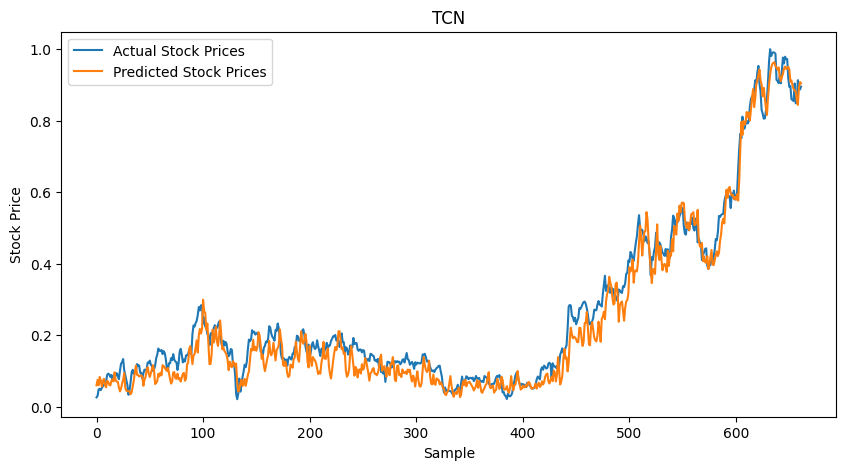

In [ ]:
# Plot the predictions vs actual values
plt.figure(figsize=(10, 5))
plt.plot(y_test.numpy(), label='Actual Stock Prices')
plt.plot(predictions, label='Predicted Stock Prices')
plt.xlabel('Sample')
plt.ylabel('Stock Price')
plt.title('TCN')
plt.legend()
plt.show()

# hyperparameter optim

In [ ]:
# Define objective function for Optuna
def objective(trial):
    # Suggest hyperparameters for tuning
    num_channels = trial.suggest_categorical('num_channels', [[32], [64], [128], [64, 64], [128, 128]])  # Different possible architectures
    kernel_size = trial.suggest_int('kernel_size', 2, 5)
    dropout = trial.suggest_float('dropout', 0.05, 0.5)
    lr = trial.suggest_float('lr', 1e-5, 1e-2, log=True)

    # Data dimensions (input_size, output_size) are placeholders
    input_size = len(X)
    output_size = predict_forward

    # Initialize the TCN model with the suggested hyperparameters
    model = TCN(input_size, num_channels, output_size, kernel_size, dropout)

    # Define loss functions and optimizer
    criterion_mse = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    # Training loop
    model.train()
    num_epochs = 50
    for epoch in range(num_epochs):
        for inputs, targets in dataloader:
            optimizer.zero_grad()
            # Permuting the input to (batch_size, num_features, sequence_length) for the TCN
            outputs = model(inputs.permute(0, 2, 1))
            loss_mse = criterion_mse(outputs.squeeze(), targets)
            loss_mse.backward()
            optimizer.step()

        # Report validation loss at each epoch
        val_loss = validate(model, X_test, y_test)  # Assuming a validation function exists
        trial.report(val_loss, epoch)

        # Prune the trial if it's not promising
        if trial.should_prune():
            raise optuna.exceptions.TrialPruned()

    return val_loss

# Validation function to evaluate the model on the validation set
def validate(model, X_test, y_test):
    model.eval()
    criterion_mse = nn.MSELoss()
    criterion_mae = nn.L1Loss()
    with torch.no_grad():
        test_outputs = model(X_test.permute(0, 2, 1))
        tcn_mse = criterion_mse(test_outputs.squeeze(), y_test)
        tcn_mae = criterion_mae(test_outputs.squeeze(), y_test)
        predictions = test_outputs.squeeze().numpy()
    return tcn_mse

# Optuna study definition
study = optuna.create_study(direction='minimize')  # Minimize the validation MSE loss
study.optimize(objective, n_trials=50)  # Number of trials

# Display the best hyperparameters found
best_trial = study.best_trial
print(f'Best trial: {best_trial.params}')
print(f'Best trial MSE loss: {best_trial.value:.6f}')

## SVR

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
svr = SVR(kernel='linear', C=10)
svr.fit(X_train.reshape(X_train.shape[0], -1), y_train)
pred_svr = svr.predict(X_test.reshape(X_test.shape[0], -1))
mse_svr = mean_squared_error(y_test, pred_svr)
mae_svr = mean_absolute_error(y_test, pred_svr)
mse_svr, mae_svr

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(0.001270392408739422,
 0.029721032136946275,
 0.2510532763113195,
 0.03564256456456833)

### GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
svr = SVR()

# Define the parameter grid
param_grid = {
    'kernel': ['linear', 'rbf','poly','sigmoid'],
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.1, 0.2, 0.5]
}


X_train_reshaped = X_train.reshape(X_train.shape[0], -1).numpy()
X_test_reshaped = X_test.reshape(X_test.shape[0], -1).numpy()

y_train_reshaped = y_train.squeeze().numpy()
y_test_reshaped = y_test.squeeze().numpy()

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
grid_search.fit(X_train_reshaped, y_train_reshaped)

# Retrieve the best model and its parameters
best_svr = grid_search.best_estimator_
best_params = grid_search.best_params_

# Use the best model to predict
pred_svr = best_svr.predict(X_test_reshaped)

# Evaluate the performance
mse_svr = mean_squared_error(y_test_reshaped, pred_svr)
mae_svr = mean_absolute_error(y_test_reshaped, pred_svr)

print("Best Parameters:", best_params)
print("MSE (SVR):", mse_svr)
print("MAE (SVR):", mae_svr)

Best Parameters: {'C': 10, 'epsilon': 0.1, 'kernel': 'linear'}
MSE (SVR): 0.0018531278447262013
MAE (SVR): 0.037535719661799215


## RF

In [ ]:
from sklearn.ensemble import RandomForestRegressor

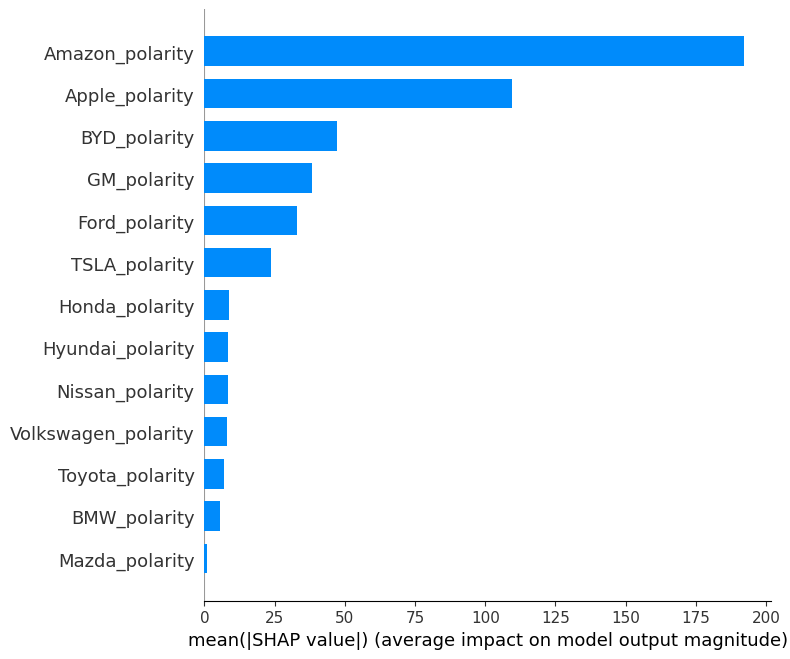

In [ ]:
# Calculate Shapley values
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import shap

data = stock_data[X]

# Separate features and target
X = data.drop(columns=['Close'])
y = data['Close']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


RF = RandomForestRegressor(max_depth=30, min_samples_leaf= 2, min_samples_split=10, n_estimators=300)
RF.fit(X_train, y_train)

explainer = shap.TreeExplainer(RF)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns, plot_type='bar')

In [ ]:
RF = RandomForestRegressor(max_depth=30, min_samples_leaf= 2, min_samples_split=10, n_estimators=300)
RF.fit(X_train.reshape(X_train.shape[0], -1), y_train)
pred_RF = RF.predict(X_test.reshape(X_test.shape[0], -1))
mse_RF = mean_squared_error(y_test, pred_RF)
mae_RF = mean_absolute_error(y_test, pred_RF)
mse_RF, mae_RF

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


(0.00047139573923023057, 0.016270987810432735)

### GridSearchCV

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Define the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200,300],          # Number of trees in the forest
    'max_depth': [10, 20, 30],         # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],         # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],           # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'] # Number of features to consider for the best split
}


X_train_reshaped = X_train.reshape(X_train.shape[0], -1).numpy()
X_test_reshaped = X_test.reshape(X_test.shape[0], -1).numpy()

y_train_reshaped = y_train.squeeze().numpy()
y_test_reshaped = y_test.squeeze().numpy()


# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
grid_search.fit(X_train_reshaped, y_train_reshaped)

# Retrieve the best model and its parameters
best_rf = grid_search.best_estimator_
best_params = grid_search.best_params_

# Use the best model to predict
pred_rf = best_rf.predict(X_test_reshaped)

# Evaluate the performance
mse_rf = mean_squared_error(y_test_reshaped, pred_rf)
mae_rf = mean_absolute_error(y_test_reshaped, pred_rf)

print("Best Parameters:", best_params)
print("MSE (Random Forest):", mse_rf)
print("MAE (Random Forest):", mae_rf)